In [2]:
from __future__ import print_function 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn as sk
import math
from copy import copy, deepcopy
# seed the pseudorandom number generator
from random import random
from random import seed
import pandas as pd




In [3]:
'''>>>>> start CodeP1.1F23
    V.P. Carey ME249, Fall 2023''' 
from random import seed
# seed random number generator
seed(1)

%matplotlib inline
# importing the required module 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10, 8] # for square canvas

#create arrays 
ydata = []
lydata = []

#Parameters for Evolution Loop
#set data parameters
ND = 45       #number of data vectors in array
DI = 5        #number of data items in vector
NS = 45       #total number of DNA strands

In [4]:
# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is:  ydata[row][column]
# this is an array that is essentially a list of lists

#assembling data array
#store array where rows are data vectors 
#[heat flux, superheat, gravity, surface tension parameter, pressure] 

ydata = [[44.1, 32.5, 0.098, 1.79, 5.5]]
ydata.append([47.4, 33.2, 0.098, 1.79, 5.5])
ydata.append([49.4, 34.2, 0.098, 1.79, 5.5])

ydata.append([59.2, 34.8, 0.098, 1.79, 5.5]) 
ydata.append([67.8, 36.3, 0.098, 1.79, 5.5]) 
ydata.append([73.6, 37.3, 0.098, 1.79, 5.5])
ydata.append([76.3, 37.8, 0.098, 1.79, 5.5]) 
ydata.append([85.3, 39.2, 0.098, 1.79, 5.5]) 
ydata.append([96.5, 39.3, 0.098, 1.79, 5.5])
ydata.append([111., 42.3, 0.098, 1.79, 5.5]) 
ydata.append([124., 43.5, 0.098, 1.79, 5.5]) 
ydata.append([136.2, 45.4, 0.098, 1.79, 5.5])

ydata.append([143.5, 46.7, 0.098, 1.79, 5.5]) 
ydata.append([154.6, 47.9, 0.098, 1.79, 5.5])
ydata.append([163.1, 48.6, 0.098, 1.79, 5.5])
ydata.append([172.8, 50.9, 0.098, 1.79, 5.5]) 
ydata.append([184.2, 51.7, 0.098, 1.79, 5.5]) 
ydata.append([203.7, 56.4, 0.098, 1.79, 5.5])  

ydata.append([36.7, 30.2, 9.8, 1.79, 5.5])
ydata.append([55.1, 34.1, 9.8, 1.79, 5.5])
ydata.append([67.5, 35.3, 9.8, 1.79, 5.5])
ydata.append([78.0, 37.8, 9.8, 1.79, 5.5])
ydata.append([92.0, 38.1, 9.8, 1.79, 5.5])
ydata.append([120., 44.1, 9.8, 1.79, 5.5])
ydata.append([134.3, 46.9, 9.8, 1.79, 5.5])
ydata.append([150.3, 48.5, 9.8, 1.79, 5.5])
ydata.append([167., 49.2, 9.8, 1.79, 5.5])
ydata.append([184., 52.7, 9.8, 1.79, 5.5])
ydata.append([196.5, 53.1, 9.8, 1.79, 5.5])   
'''
ydata.append([42.4, 28.0, 19.6, 1.79, 9.5]) 
ydata.append([48.7, 29.3, 19.6, 1.79, 9.5]) 
ydata.append([54.5, 29.6, 19.6, 1.79, 9.5])

ydata.append([62.1, 28.5, 19.6, 1.79, 9.5])
ydata.append([70.8, 30.5, 19.6, 1.79, 9.5])
ydata.append([73.7, 30.3, 19.6, 1.79, 9.5])
ydata.append([81.8, 30.6, 19.6, 1.79, 9.5])
ydata.append([91.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([103.9, 34.5, 19.6, 1.79, 9.5])
ydata.append([119.1, 35.4, 19.6, 1.79, 9.5])
ydata.append([133.7, 36.8, 19.6, 1.79, 9.5])
ydata.append([139.9, 38.1, 19.6, 1.79, 9.5])
ydata.append([148.3, 39.1, 19.6, 1.79, 9.5])
ydata.append([157.0, 40.0, 19.6, 1.79, 9.5])
ydata.append([169.1, 42.2, 19.6, 1.79, 9.5])
ydata.append([179.2, 43.2, 19.6, 1.79, 9.5])
ydata.append([205.0, 46.0, 19.6, 1.79, 9.5])  
'''
ydata.append([42.4, 29.7, 19.6, 1.79, 5.5])
ydata.append([48.7, 31.0, 19.6, 1.79, 5.5])
ydata.append([54.5, 31.2, 19.6, 1.79, 5.5])
ydata.append([70.8, 32.4, 19.6, 1.79, 5.5])
ydata.append([73.7, 31.4, 19.6, 1.79, 5.5])
ydata.append([81.8, 32.5, 19.6, 1.79, 5.5])
ydata.append([91.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([103.9, 36.3, 19.6, 1.79, 5.5])
ydata.append([119.1, 37.2, 19.6, 1.79, 5.5])
ydata.append([133.7, 38.4, 19.6, 1.79, 5.5])
ydata.append([139.9, 39.7, 19.6, 1.79, 5.5])
ydata.append([148.3, 40.9, 19.6, 1.79, 5.5])
ydata.append([157.0, 41.6, 19.6, 1.79, 5.5])
ydata.append([169.1, 43.9, 19.6, 1.79, 5.5])
ydata.append([179.2, 45.0, 19.6, 1.79, 5.5])
ydata.append([205.0, 47.9, 19.6, 1.79, 5.5])   
'''
ydata.append([77.0, 41.5, 9.8, 0.00, 7.0])  
ydata.append([71.0, 40.5, 9.8, 0.00, 7.0])
ydata.append([66.0, 39.5, 9.8, 0.00, 7.0])
ydata.append([62.0, 38.5, 9.8, 0.00, 7.0])
ydata.append([42.0, 34.0, 9.8, 0.00, 7.0])
ydata.append([60.0, 37.5, 9.8, 0.00, 7.0])
ydata.append([53.0, 37.0, 9.8, 0.00, 7.0])    

ydata.append([71.7, 36.4, 0.098, 1.71, 5.5])  
ydata.append([81.5, 38.5, 0.098, 1.71, 5.5])
ydata.append([90.7, 39.5, 0.098, 1.71, 5.5])
ydata.append([103.3, 41.6, 0.098, 1.71, 5.5])
ydata.append([117.0, 43.1, 0.098, 1.71, 5.5])
ydata.append([138.6, 45.4, 0.098, 1.71, 5.5])
ydata.append([161.7, 47.9, 0.098, 1.71, 5.5])
ydata.append([207.5, 50.9, 0.098, 1.71, 5.5])    
'''
# print the data array
print ('ydata =', ydata)

ydata = [[44.1, 32.5, 0.098, 1.79, 5.5], [47.4, 33.2, 0.098, 1.79, 5.5], [49.4, 34.2, 0.098, 1.79, 5.5], [59.2, 34.8, 0.098, 1.79, 5.5], [67.8, 36.3, 0.098, 1.79, 5.5], [73.6, 37.3, 0.098, 1.79, 5.5], [76.3, 37.8, 0.098, 1.79, 5.5], [85.3, 39.2, 0.098, 1.79, 5.5], [96.5, 39.3, 0.098, 1.79, 5.5], [111.0, 42.3, 0.098, 1.79, 5.5], [124.0, 43.5, 0.098, 1.79, 5.5], [136.2, 45.4, 0.098, 1.79, 5.5], [143.5, 46.7, 0.098, 1.79, 5.5], [154.6, 47.9, 0.098, 1.79, 5.5], [163.1, 48.6, 0.098, 1.79, 5.5], [172.8, 50.9, 0.098, 1.79, 5.5], [184.2, 51.7, 0.098, 1.79, 5.5], [203.7, 56.4, 0.098, 1.79, 5.5], [36.7, 30.2, 9.8, 1.79, 5.5], [55.1, 34.1, 9.8, 1.79, 5.5], [67.5, 35.3, 9.8, 1.79, 5.5], [78.0, 37.8, 9.8, 1.79, 5.5], [92.0, 38.1, 9.8, 1.79, 5.5], [120.0, 44.1, 9.8, 1.79, 5.5], [134.3, 46.9, 9.8, 1.79, 5.5], [150.3, 48.5, 9.8, 1.79, 5.5], [167.0, 49.2, 9.8, 1.79, 5.5], [184.0, 52.7, 9.8, 1.79, 5.5], [196.5, 53.1, 9.8, 1.79, 5.5], [42.4, 29.7, 19.6, 1.79, 5.5], [48.7, 31.0, 19.6, 1.79, 5.5], [54.5, 3

In [5]:
# print the data array
print ('ydata =', ydata)


# need deepcopy to create an array of the same size as ydata, 
#   since this array is a list(rows) of lists (column entries)  
lydata = deepcopy(ydata)  # create array to store ln of data values


# j is column, i is row downward for ydata[i][j] - both start at zero
# so it is:  ydata[row][column]
#now store log values for data
for j in range(DI):
    for i in range(ND):
        lydata[i][j]=math.log(ydata[i][j]+0.000000000010)

#OK now have stored array of log values for data

#end CodeP1.1F23

ydata = [[44.1, 32.5, 0.098, 1.79, 5.5], [47.4, 33.2, 0.098, 1.79, 5.5], [49.4, 34.2, 0.098, 1.79, 5.5], [59.2, 34.8, 0.098, 1.79, 5.5], [67.8, 36.3, 0.098, 1.79, 5.5], [73.6, 37.3, 0.098, 1.79, 5.5], [76.3, 37.8, 0.098, 1.79, 5.5], [85.3, 39.2, 0.098, 1.79, 5.5], [96.5, 39.3, 0.098, 1.79, 5.5], [111.0, 42.3, 0.098, 1.79, 5.5], [124.0, 43.5, 0.098, 1.79, 5.5], [136.2, 45.4, 0.098, 1.79, 5.5], [143.5, 46.7, 0.098, 1.79, 5.5], [154.6, 47.9, 0.098, 1.79, 5.5], [163.1, 48.6, 0.098, 1.79, 5.5], [172.8, 50.9, 0.098, 1.79, 5.5], [184.2, 51.7, 0.098, 1.79, 5.5], [203.7, 56.4, 0.098, 1.79, 5.5], [36.7, 30.2, 9.8, 1.79, 5.5], [55.1, 34.1, 9.8, 1.79, 5.5], [67.5, 35.3, 9.8, 1.79, 5.5], [78.0, 37.8, 9.8, 1.79, 5.5], [92.0, 38.1, 9.8, 1.79, 5.5], [120.0, 44.1, 9.8, 1.79, 5.5], [134.3, 46.9, 9.8, 1.79, 5.5], [150.3, 48.5, 9.8, 1.79, 5.5], [167.0, 49.2, 9.8, 1.79, 5.5], [184.0, 52.7, 9.8, 1.79, 5.5], [196.5, 53.1, 9.8, 1.79, 5.5], [42.4, 29.7, 19.6, 1.79, 5.5], [48.7, 31.0, 19.6, 1.79, 5.5], [54.5, 3

In [6]:
#converting ydata into a dataframe for easier usage
cols = ["Heat Flux (W/cm^2)", "Superheat (ºC)", "Gravitational Acceleration (ms^-2)", "Surface Tension Parameter","System Pressure (kPa)"]
ydataDf = pd.DataFrame(ydata, columns=cols)


In [7]:
ydataDf_micro = ydataDf.iloc[:18]
ydataDf_micro

,Heat Flux (W/cm^2),Superheat (ºC),Gravitational Acceleration (ms^-2),Surface Tension Parameter,System Pressure (kPa)
0,44.1,32.5,0.098,1.79,5.5
1,47.4,33.2,0.098,1.79,5.5
2,49.4,34.2,0.098,1.79,5.5
3,59.2,34.8,0.098,1.79,5.5
4,67.8,36.3,0.098,1.79,5.5
5,73.6,37.3,0.098,1.79,5.5
6,76.3,37.8,0.098,1.79,5.5
7,85.3,39.2,0.098,1.79,5.5
8,96.5,39.3,0.098,1.79,5.5
9,111.0,42.3,0.098,1.79,5.5


In [8]:
ydataDf_normal = ydataDf[18:29]
ydataDf_normal = ydataDf_normal.reset_index(drop=True)
ydataDf_normal

,Heat Flux (W/cm^2),Superheat (ºC),Gravitational Acceleration (ms^-2),Surface Tension Parameter,System Pressure (kPa)
0,36.7,30.2,9.8,1.79,5.5
1,55.1,34.1,9.8,1.79,5.5
2,67.5,35.3,9.8,1.79,5.5
3,78.0,37.8,9.8,1.79,5.5
4,92.0,38.1,9.8,1.79,5.5
5,120.0,44.1,9.8,1.79,5.5
6,134.3,46.9,9.8,1.79,5.5
7,150.3,48.5,9.8,1.79,5.5
8,167.0,49.2,9.8,1.79,5.5
9,184.0,52.7,9.8,1.79,5.5


In [9]:
ydataDf_double = ydataDf[29:45]
ydataDf_double = ydataDf_double.reset_index(drop=True)
ydataDf_double

,Heat Flux (W/cm^2),Superheat (ºC),Gravitational Acceleration (ms^-2),Surface Tension Parameter,System Pressure (kPa)
0,42.4,29.7,19.6,1.79,5.5
1,48.7,31.0,19.6,1.79,5.5
2,54.5,31.2,19.6,1.79,5.5
3,70.8,32.4,19.6,1.79,5.5
4,73.7,31.4,19.6,1.79,5.5
5,81.8,32.5,19.6,1.79,5.5
6,91.9,36.3,19.6,1.79,5.5
7,103.9,36.3,19.6,1.79,5.5
8,119.1,37.2,19.6,1.79,5.5
9,133.7,38.4,19.6,1.79,5.5


## Heat flux against wall superheat plots

* Plots are log scaled

### g = 0.098

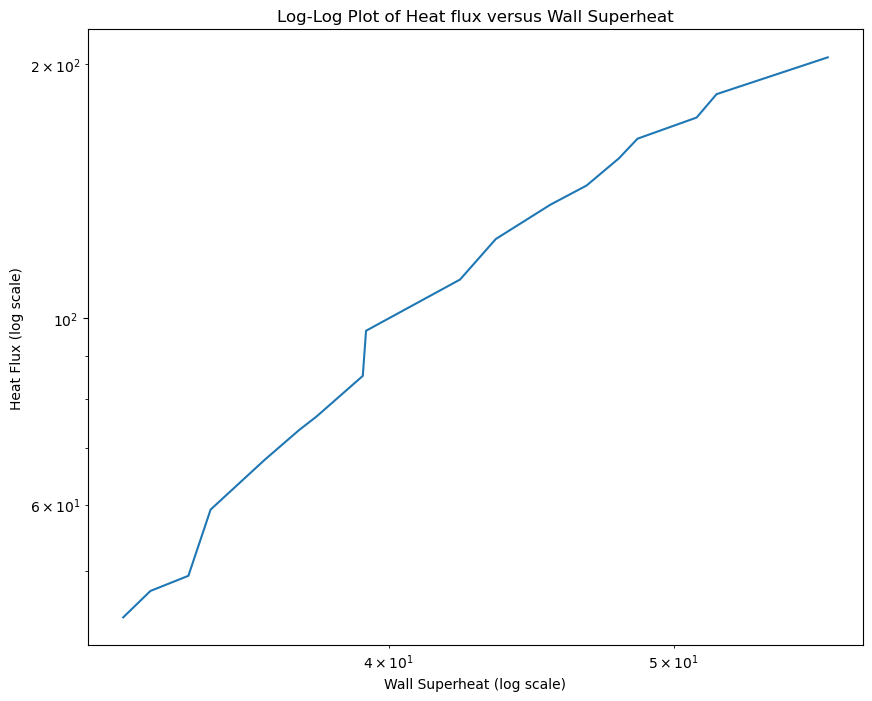

In [10]:
plt.loglog(ydataDf_micro['Superheat (ºC)'], ydataDf_micro['Heat Flux (W/cm^2)'], label = 'Heat Flux versus Wall Superheat')
plt.title("Log-Log Plot of Heat flux versus Wall Superheat")
plt.xlabel("Wall Superheat (log scale)")
plt.ylabel("Heat Flux (log scale)")
plt.show()

### g = 9.8

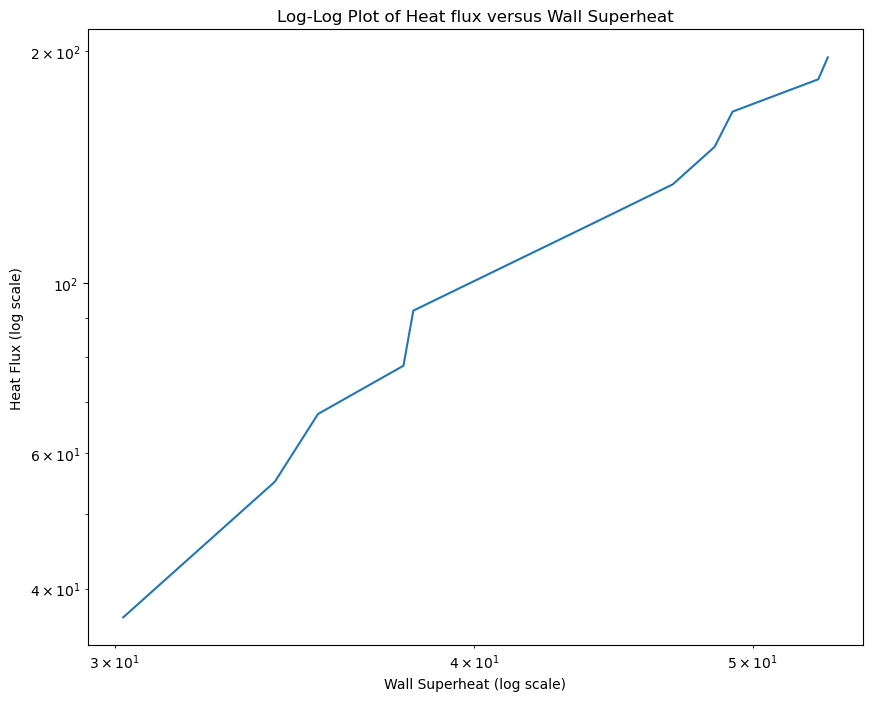

In [11]:
plt.loglog(ydataDf_normal['Superheat (ºC)'], ydataDf_normal['Heat Flux (W/cm^2)'], label = 'Heat Flux versus Wall Superheat')
plt.title("Log-Log Plot of Heat flux versus Wall Superheat")
plt.xlabel("Wall Superheat (log scale)")
plt.ylabel("Heat Flux (log scale)")
plt.show()

### Combined Graphs of 9.8 and 0.098

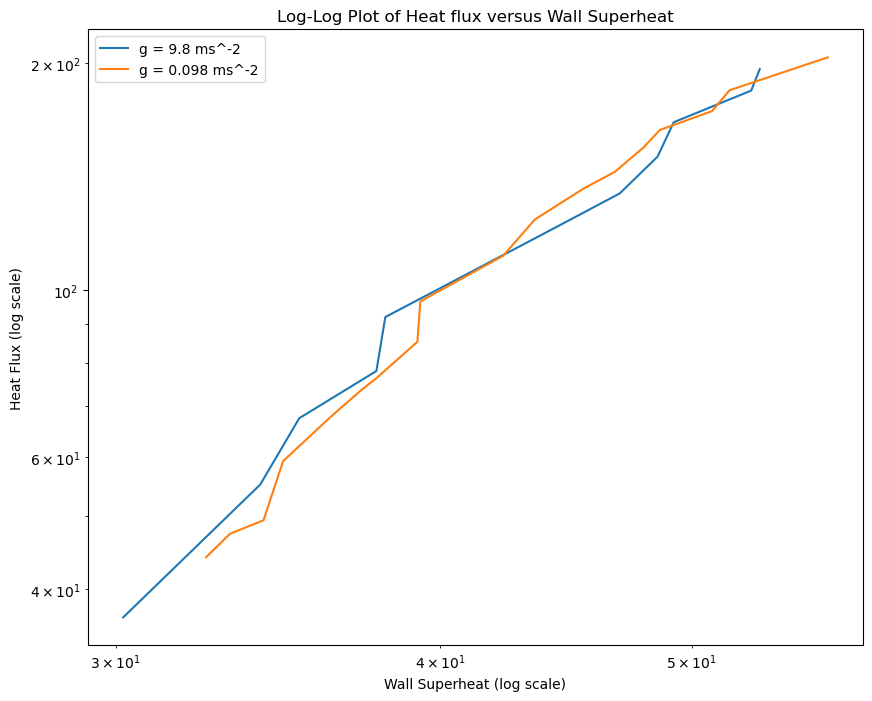

In [12]:
plt.loglog(ydataDf_normal['Superheat (ºC)'], ydataDf_normal['Heat Flux (W/cm^2)'], label = 'g = 9.8 ms^-2')
plt.title("Log-Log Plot of Heat flux versus Wall Superheat")
plt.legend()
plt.xlabel("Wall Superheat (log scale)")
plt.ylabel("Heat Flux (log scale)")

plt.loglog(ydataDf_micro['Superheat (ºC)'], ydataDf_micro['Heat Flux (W/cm^2)'], label = 'g = 0.098 ms^-2')
plt.title("Log-Log Plot of Heat flux versus Wall Superheat")
plt.xlabel("Wall Superheat (log scale)")
plt.legend()
plt.ylabel("Heat Flux (log scale)")

plt.show()

## Task 1.2

1. Run code for different initial guesses. Observe the output and see how sensitive it is for these initial guesses. Should result in convergence.
2. Summarize the results of the 4 sets of initial guesses for n1, n2, and n3
3. Constuct a log-log plot 
4. Determine the rms deviation
5. Check if average deviation is greater or less than uncertainty
6. Assess the fit in terms of the question's context

In [13]:
def gen_algo(n1,n2,n3):
    '''>>>>> start CodeP1.2F23
    V.P. Carey ME249, Fall 2023''' 


    '''INITIALIZING PARAMETERS'''
    n = []
    ntemp = []
    gen=[0]
    n1avg = [0.0]
    n2avg = [0.0]
    n3avg = [0.0]
    n4avg = [0.0]
    n5avg = [0.0]
    meanAFerr=[0.0]
    aFerrmeanavgn=[0.0] 

    #set program parameters
    NGEN = 6000      #number of generations (steps)
    MFRAC = 0.5   # faction of median threshold

    # here the number of data vectors equals the number of DNA strands (or organisms)
    # they can be different if they are randomly paired to compute Ferr (survivability) function
    for k in range(NGEN-1):
        gen.append(k+1)   # generation array stores the
        meanAFerr.append(0.0)
        aFerrmeanavgn.append(0.0)
        n1avg.append(0.0)
        n2avg.append(0.0)
        n3avg.append(0.0)
        n4avg.append(0.0)
        n5avg.append(0.0)
        
    '''guesses for initial solution population'''
    n0i =  -1.0 
    n1i = n1
    n2i = n2
    n3i = n3
    n4i = 1.215 
    n5i = 0.145


    #- initialize arrays before start of evolution loop EL
    #then - create array of DNA strands n[i] and ntemp[i] with dimesnion NS = 5

    #i initialize array where rows are dna vectors [n0i,n1i,...n5i] with random pertubations
    n =  [[-1., n1i+0.001*random(), n2i+0.1*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()]]
    for i in range(ND):
        n.append([-1., n1i+0.0001*random(), n2i+0.001*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()])
    #print (n) # uncomment command to print array so it can be checked

    # store also in wtemp
    ntemp = deepcopy(n)

    #initialize Ferr values and other loop parameters
    #define arrays of Ferr (error) functions
    #individual solution error and absoute error
    Ferr =  [[0.0]]  
    #population average solution error and absoute error
    Ferravgn =  [[0.0]]
    aFerr =  [[0.0]]
    aFerravgn =  [[0.0]]

    #store zeros in ND genes
    for i in range(ND-1):
        #individual solution error and absoute error
        Ferr.append([0.0])
        aFerr.append([0.0])
        #population average solution error and absoute error
        Ferravgn.append([0.0])
        aFerravgn.append([0.0])
    #print (Ferr)

    aFerrmeanavgnMin=1000000000.0 
    # these store the  n values for minimum population average error durng NGEN generations
    n1min = 0.0
    n2min = 0.0
    n3min = 0.0
    n4min = 0.0
    n5min = 0.0
    aFerrta = 0.0
    # these store the time averaged n values durng from generation 800 to NGEN generations
    n1min = 0.0
    n1ta = 0.0
    n2ta = 0.0
    n3ta = 0.0
    n4ta = 0.0
    n5ta = 0.0

    '''START OF EVOLUTION LOOP'''
    # ------------------------------------------
    # k is generation number, NGEN IS TOTAL NUMBER OF GENERATIONS COMPUTED
    for k in range(NGEN):
        
        '''In this program , the number of organisms (solutions) NS is taken to be equal to the 
        number of data points ND so for each generation, each solution can be compared to a different 
        data point and all the data is compared in each generation.  The order of the solutions in the array 
        that holds the solution constants is constantly changing due to mating and selection, so the pairing 
        is random.'''
        
        
        '''CALCULATING ERROR (FITNESS)
        In this program, the absolute error in the logrithm of the physical heat flux is 
        used to evaluate fitness.'''
        
        # Here we calculate error Ferr and absolute error aFerr for each data point and organism pair 
        # for specified n(i), and calculate (mean aFerr) = aFerrmean
        # and (median aFerr) = aFerrmedian for the data collection and specified n(i)
        # Note that the number data points ND equals the number of solutions (organisms) in the population
        #====================================================================================
        '''CALCULATING ERROR (FITNESS)'''
        for i in range(ND):
            
            Ferr[i] = n[i][0]*lydata[i][0] + math.log(n[i][1]) + n[i][2]*lydata[i][1]
            Ferr[i] = Ferr[i] + n[i][3]*math.log( ydata[i][2] ) 
            
            aFerr[i] = abs(Ferr[i])/abs(lydata[i][0])  #- absolute fractional error
        #-------------
        aFerrmean = np.mean(aFerr) #mean error for population for this generation
        meanAFerr[k]=aFerrmean  #store aFerrmean for this generation gen[k]=k
        aFerrmedian = np.median(aFerr) #median error for population for this generation

        '''SELECTION'''
        #pick survivors 
        #[2] calculate survival cutoff, set number kept = nkeep = 0
        #==============================================
        clim = MFRAC*aFerrmedian  #cut off limit is a fraction/multiplier MFRAC of median value for population
        nkeep = 0
        
        # now check each organism/solution to see if aFerr is less than cut of limit
        #if yes, store n for next generation population in ntemp, at end nkeep = number that survive
        #and number of new offspring = NS-nkeep
        #==============================================
        for j in range(NS):  # NS Ferr values, one for each solution in population
            if (aFerr[j] < clim):
                nkeep = nkeep + 1
                #ntemp[nkeep][0] = n[j][0] = -1 so it is unchanged;
                ntemp[nkeep-1][1] = n[j][1];
                ntemp[nkeep-1][2] = n[j][2];
                ntemp[nkeep-1][3] = n[j][3];
                ntemp[nkeep-1][4] = n[j][4];
                ntemp[nkeep-1][5] = n[j][5];
        #now have survivors in leading entries in list of ntemp vectors from 1 to nkeep
        #compute number to be added by mating
        nnew = NS - nkeep  
        
        '''MATING'''
        #[4] for nnew new organisms/solutions,
        # randomly pick two survivors, randomly pick DNA (n) from pair for each offspring
        #==============================================================
        for j in range(nnew): 
            # pick two survivors randomly
            nmate1 = np.random.randint(low=0, high=nkeep+1)
            nmate2 = np.random.randint(low=0, high=nkeep+1)
            
            #then randomly pick DNA from parents for offspring
            
            '''here, do not change property ntemp[nkeep+j+1][0], it's always fixed at the value -1'''
            #if (np.random.rand() < 0.5)
            #    ntemp[nkeep+j+1][0] = n[nmate1][0]  
            #else
            #    ntemp[nkeep+j+1][0] = n[nmate2][0]
        
            if (np.random.rand() < 0.5):
                ntemp[nkeep+j+1][1] = n[nmate1][1]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 1, mutation added
            else:
                ntemp[nkeep+j+1][1] = n[nmate2][1]*(1.+0.09*2.*(0.5-np.random.rand()))
        
            if (np.random.rand() < 0.5):
                ntemp[nkeep+j+1][2] = n[nmate1][2]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 2, mutation added
            else:
                ntemp[nkeep+j+1][2] = n[nmate2][2]*(1.+0.09*2.*(0.5-np.random.rand()))
        
            if (np.random.rand() < 0.5):
                ntemp[nkeep+j+1][3] = n[nmate1][3]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 3, mutation added
            else:
                ntemp[nkeep+j+1][3] = n[nmate2][3]*(1.+0.09*2.*(0.5-np.random.rand()))
            '''    
            if (np.random.rand() < 0.5):
                ntemp[nkeep+j+1][4] = n[nmate1][4]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 4, mutation added
            else:
                ntemp[nkeep+j+1][4] = n[nmate2][4]*(1.+0.09*2.*(0.5-np.random.rand()))
                    
            if (np.random.rand() < 0.5):
                ntemp[nkeep+j+1][5] = n[nmate1][5]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 5, mutation added
            else:
                ntemp[nkeep+j+1][5] = n[nmate2][5]*(1.+0.09*2.*(0.5-np.random.rand()))
            '''
        #=============================================
        n = deepcopy(ntemp)   # save ntemp as n for use in next generation (next iteration)
        
        
        '''AVERAGING OVER POPULATION AND OVER TIME, FINDING MINIMUM ERROR SET OF n VALUES'''
        # [6] calculate n1avg[k], etc., which are average n values for population of organisms (solutions) 
        # at this generation k
        #=============================================
        #initialize average n's to zero and sum contribution of each member of the solution population 
        n1avg[k] = 0.0;
        n2avg[k] = 0.0;
        n3avg[k] = 0.0;
        n4avg[k] = 0.0;
        n5avg[k] = 0.0;
        for j in range(NS):    
            n1avg[k] = n1avg[k] + n[j][1]/NS; 
            n2avg[k] = n2avg[k] + n[j][2]/NS; 
            n3avg[k] = n3avg[k] + n[j][3]/NS;
            n4avg[k] = n4avg[k] + n[j][4]/NS;
            n5avg[k] = n5avg[k] + n[j][5]/NS;

        # Here we compute aFerravgn[i] = absolute Ferr of logrithm data point i using average n values 
        # for this solutions generation k
        # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
        # 
        #=============================================
        ''' CALCULATING MEAN ERROR FOR POPULATION'''
        for i in range(ND): 
            Ferravgn[i] = -1.*lydata[i][0] + math.log(n1avg[k]) + n2avg[k]*lydata[i][1]
            Ferravgn[i] = Ferravgn[i] + n3avg[k]*math.log( ydata[i][2] ) 
                
            #aFerravgn[i] = abs(Ferr[i])/abs(lydata[i][0])
            aFerravgn[i] = abs(Ferravgn[i])/abs(lydata[i][0])
        #-------------
        aFerrmeanavgn[k] = np.mean(aFerravgn)
        
        
        # next, update time average of n valaues in population (n1ta[k], etc.) 
        # for generations = k > 800 up to total NGEN
        #=============================================
        aFerrta = aFerrta + aFerrmeanavgn[k]/NGEN
        if (k > 800):
            n1ta = n1ta + n1avg[k]/(NGEN-800)
            n2ta = n2ta + n2avg[k]/(NGEN-800)
            n3ta = n3ta + n3avg[k]/(NGEN-800)
            n4ta = n4ta + n4avg[k]/(NGEN-800)
            n5ta = n5ta + n5avg[k]/(NGEN-800)
        
        # compare aFerrmeanavgn[k] to previous minimum value and save 
        # it and corresponding n(i) values if the value for this generation k is lower 
        #=============================================
        if (aFerrmeanavgn[k] < aFerrmeanavgnMin):
            aFerrmeanavgnMin = aFerrmeanavgn[k] 
            n1min = n1avg[k]
            n2min = n2avg[k]
            n3min = n3avg[k]
            n4min = n4avg[k]
            n5min = n5avg[k]
        
        #print('avg n1-n4:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], aFerrmeanavgn[k])
        #print ('kvalue =', k)
        '''end of evolution loop'''
        # ------------------------------------------------------------------
        # ------------------------------------------------------------------
        
        
    # ------------------------------------------------------------------
    #final print and plot of results
    # ------------------------------------------------------------------
    print('ENDING: pop. avg n1-n3,aFerrmean:', n1avg[k], n2avg[k], n3avg[k], aFerrmeanavgn[k])
    print('MINUMUM:  avg n1-n3,aFerrmeanMin:', n1min, n2min, n3min, aFerrmeanavgnMin)
    print('TIME AVG:    avg n1-n3,aFerrmean:', n1ta, n2ta, n3ta, aFerrta)

    #SETTING UP PLOTS

    #========
    #initialize values
    qpppred =  [[0.0]]
    qppdata =  [[0.0]]
    for i in range(ND-1):
        qpppred.append([0.0])
        qppdata.append([0.0])   
    #calculate predicted and data values to plot
    for i in range(ND):
        qpppred[i] = n1min*(ydata[i][1]**n2min) * ((ydata[i][2])**n3min) 
        qppdata[i] = ydata[i][0] 
        
    #========

    # constants evolution plots
    # x axis values are generation number 
    # corresponding y axis values are mean absolute population error aFerrmeanavgn and n values
    # plotting the points  

    plt.rcParams.update({'font.size': 18})

    # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
    # computed using the mean n values
    plt.plot(gen, aFerrmeanavgn) 
    plt.plot(gen, n1avg)
    plt.plot(gen, n2avg)
    plt.plot(gen, n3avg)
    plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg'], loc='lower left')
    #plt.plot(gen, n4avg)
    #plt.plot(gen, n5avg)
    #plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg', 'n4 avg', 'n5 avg'], loc='upper right')

    # naming the x axis 
    plt.xlabel('generation') 
    # naming the y axis 
    plt.ylabel('constants and error') 
    plt.loglog()
    plt.yticks([0.01,0.1,1.0,10])
    plt.xticks([1,10,100,1000,10000]) 
    plt.show() 


    '''CALCULATE PREDICTED VALUES AND RETRIEVE DATA VALUES TO PLOT'''
    plt.scatter(qpppred, qppdata)
    plt.title('Genetic Algorithm')
    plt.xlabel('predicted heat flux (W/cm^2), n1min - n3min constants')
    plt.ylabel('measured heat flux (W/cm^2)')
    plt.loglog()
    plt.xlim(xmax = 1000, xmin = 10)
    plt.ylim(ymax = 1000, ymin = 10)

    plt.show()
        
    # end CodeP1.2F23 





## Guess 1
* n1i = 0.00027
* n2i = 4.0
* n3i = 0.063

ENDING: pop. avg n1-n3,aFerrmean: 0.00033216548136499527 3.4438674102116043 0.07020914343268127 0.035439472474264266
MINUMUM:  avg n1-n3,aFerrmeanMin: 0.0004459029969654974 3.344181494847891 0.05962761099462274 0.030748879768055203
TIME AVG:    avg n1-n3,aFerrmean: 0.00031111466402525154 3.4445398516555445 0.06786105605751162 0.036874340408701786


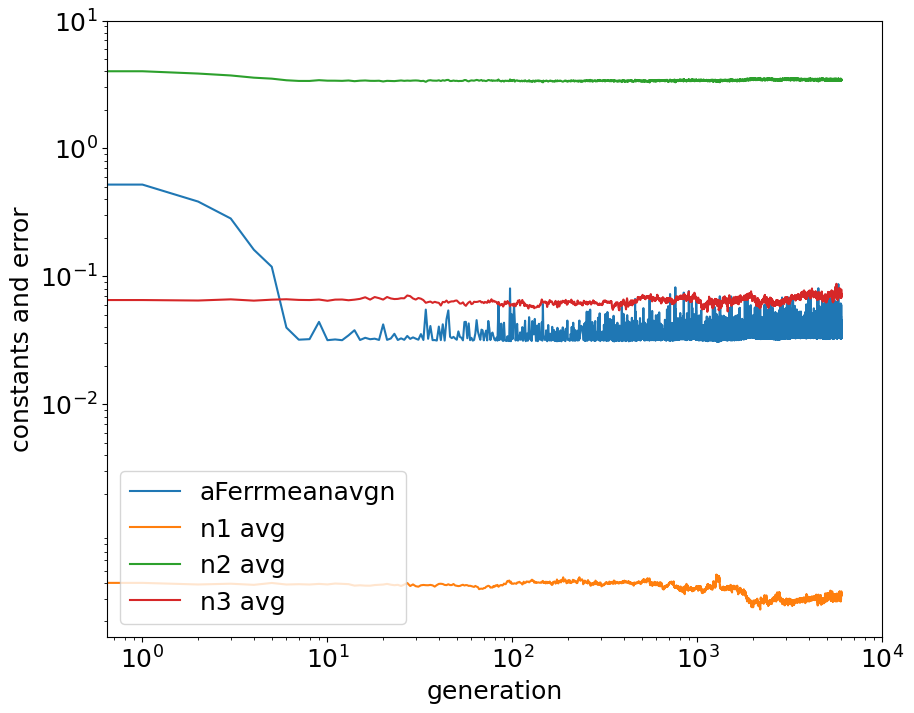

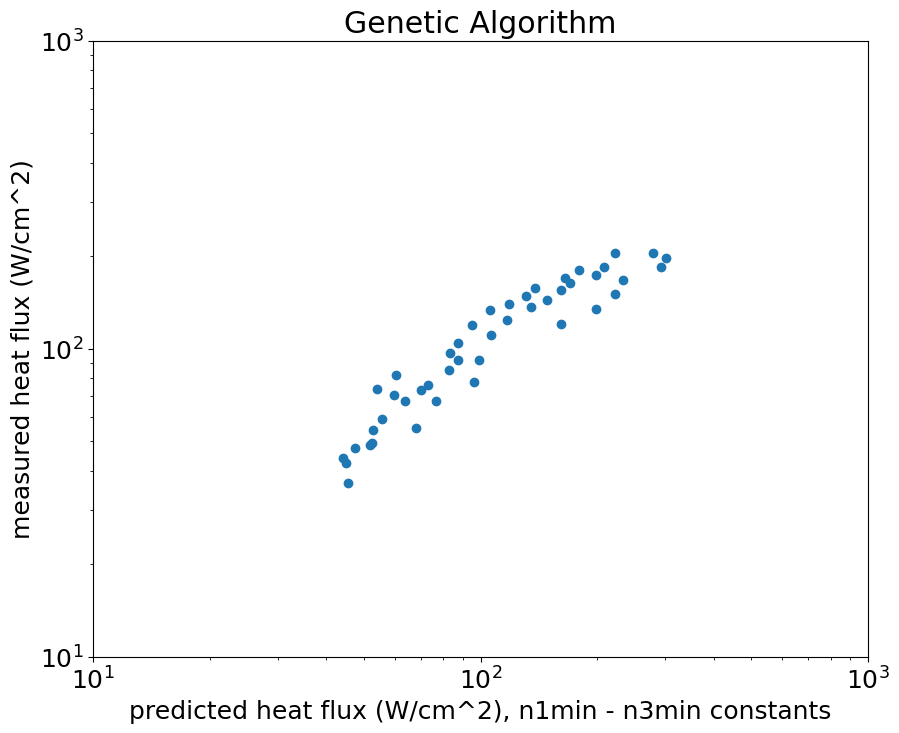

In [14]:
'''>>>>> start CodeP1.2F23
    V.P. Carey ME249, Fall 2023''' 


'''INITIALIZING PARAMETERS'''
n = []
ntemp = []
gen=[0]
n1avg = [0.0]
n2avg = [0.0]
n3avg = [0.0]
n4avg = [0.0]
n5avg = [0.0]
meanAFerr=[0.0]
aFerrmeanavgn=[0.0] 

#set program parameters
NGEN = 6000      #number of generations (steps)
MFRAC = 0.5   # faction of median threshold

# here the number of data vectors equals the number of DNA strands (or organisms)
# they can be different if they are randomly paired to compute Ferr (survivability) function
for k in range(NGEN-1):
    gen.append(k+1)   # generation array stores the
    meanAFerr.append(0.0)
    aFerrmeanavgn.append(0.0)
    n1avg.append(0.0)
    n2avg.append(0.0)
    n3avg.append(0.0)
    n4avg.append(0.0)
    n5avg.append(0.0)
    
'''guesses for initial solution population'''
n0i =  -1.0 
n1i = 0.00027
n2i = 4.0
n3i = 0.063
n4i = 1.215 
n5i = 0.145


#- initialize arrays before start of evolution loop EL
#then - create array of DNA strands n[i] and ntemp[i] with dimesnion NS = 5

#i initialize array where rows are dna vectors [n0i,n1i,...n5i] with random pertubations
n =  [[-1., n1i+0.001*random(), n2i+0.1*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()]]
for i in range(ND):
    n.append([-1., n1i+0.0001*random(), n2i+0.001*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()])
#print (n) # uncomment command to print array so it can be checked

# store also in wtemp
ntemp = deepcopy(n)

#initialize Ferr values and other loop parameters
#define arrays of Ferr (error) functions
#individual solution error and absoute error
Ferr =  [[0.0]]  
#population average solution error and absoute error
Ferravgn =  [[0.0]]
aFerr =  [[0.0]]
aFerravgn =  [[0.0]]

#store zeros in ND genes
for i in range(ND-1):
    #individual solution error and absoute error
    Ferr.append([0.0])
    aFerr.append([0.0])
    #population average solution error and absoute error
    Ferravgn.append([0.0])
    aFerravgn.append([0.0])
#print (Ferr)

aFerrmeanavgnMin=1000000000.0 
# these store the  n values for minimum population average error durng NGEN generations
n1min = 0.0
n2min = 0.0
n3min = 0.0
n4min = 0.0
n5min = 0.0
aFerrta = 0.0
# these store the time averaged n values durng from generation 800 to NGEN generations
n1min = 0.0
n1ta = 0.0
n2ta = 0.0
n3ta = 0.0
n4ta = 0.0
n5ta = 0.0

'''START OF EVOLUTION LOOP'''
# ------------------------------------------
# k is generation number, NGEN IS TOTAL NUMBER OF GENERATIONS COMPUTED
for k in range(NGEN):
    
    '''In this program , the number of organisms (solutions) NS is taken to be equal to the 
    number of data points ND so for each generation, each solution can be compared to a different 
    data point and all the data is compared in each generation.  The order of the solutions in the array 
    that holds the solution constants is constantly changing due to mating and selection, so the pairing 
    is random.'''
    
    
    '''CALCULATING ERROR (FITNESS)
    In this program, the absolute error in the logrithm of the physical heat flux is 
    used to evaluate fitness.'''
    
    # Here we calculate error Ferr and absolute error aFerr for each data point and organism pair 
    # for specified n(i), and calculate (mean aFerr) = aFerrmean
    # and (median aFerr) = aFerrmedian for the data collection and specified n(i)
    # Note that the number data points ND equals the number of solutions (organisms) in the population
    #====================================================================================
    '''CALCULATING ERROR (FITNESS)'''
    for i in range(ND):
        
        Ferr[i] = n[i][0]*lydata[i][0] + math.log(n[i][1]) + n[i][2]*lydata[i][1]
        Ferr[i] = Ferr[i] + n[i][3]*math.log( ydata[i][2] ) 
           
        aFerr[i] = abs(Ferr[i])/abs(lydata[i][0])  #- absolute fractional error
    #-------------
    aFerrmean = np.mean(aFerr) #mean error for population for this generation
    meanAFerr[k]=aFerrmean  #store aFerrmean for this generation gen[k]=k
    aFerrmedian = np.median(aFerr) #median error for population for this generation

    '''SELECTION'''
    #pick survivors 
    #[2] calculate survival cutoff, set number kept = nkeep = 0
    #==============================================
    clim = MFRAC*aFerrmedian  #cut off limit is a fraction/multiplier MFRAC of median value for population
    nkeep = 0
    
    # now check each organism/solution to see if aFerr is less than cut of limit
    #if yes, store n for next generation population in ntemp, at end nkeep = number that survive
    #and number of new offspring = NS-nkeep
    #==============================================
    for j in range(NS):  # NS Ferr values, one for each solution in population
        if (aFerr[j] < clim):
            nkeep = nkeep + 1
            #ntemp[nkeep][0] = n[j][0] = -1 so it is unchanged;
            ntemp[nkeep-1][1] = n[j][1];
            ntemp[nkeep-1][2] = n[j][2];
            ntemp[nkeep-1][3] = n[j][3];
            ntemp[nkeep-1][4] = n[j][4];
            ntemp[nkeep-1][5] = n[j][5];
    #now have survivors in leading entries in list of ntemp vectors from 1 to nkeep
    #compute number to be added by mating
    nnew = NS - nkeep  
    
    '''MATING'''
    #[4] for nnew new organisms/solutions,
    # randomly pick two survivors, randomly pick DNA (n) from pair for each offspring
    #==============================================================
    for j in range(nnew): 
        # pick two survivors randomly
        nmate1 = np.random.randint(low=0, high=nkeep+1)
        nmate2 = np.random.randint(low=0, high=nkeep+1)
        
        #then randomly pick DNA from parents for offspring
        
        '''here, do not change property ntemp[nkeep+j+1][0], it's always fixed at the value -1'''
        #if (np.random.rand() < 0.5)
        #    ntemp[nkeep+j+1][0] = n[nmate1][0]  
        #else
        #    ntemp[nkeep+j+1][0] = n[nmate2][0]
      
        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][1] = n[nmate1][1]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 1, mutation added
        else:
            ntemp[nkeep+j+1][1] = n[nmate2][1]*(1.+0.09*2.*(0.5-np.random.rand()))
    
        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][2] = n[nmate1][2]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 2, mutation added
        else:
            ntemp[nkeep+j+1][2] = n[nmate2][2]*(1.+0.09*2.*(0.5-np.random.rand()))
    
        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][3] = n[nmate1][3]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 3, mutation added
        else:
            ntemp[nkeep+j+1][3] = n[nmate2][3]*(1.+0.09*2.*(0.5-np.random.rand()))
        '''    
        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][4] = n[nmate1][4]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 4, mutation added
        else:
            ntemp[nkeep+j+1][4] = n[nmate2][4]*(1.+0.09*2.*(0.5-np.random.rand()))
                
        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][5] = n[nmate1][5]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 5, mutation added
        else:
            ntemp[nkeep+j+1][5] = n[nmate2][5]*(1.+0.09*2.*(0.5-np.random.rand()))
        '''
    #=============================================
    n = deepcopy(ntemp)   # save ntemp as n for use in next generation (next iteration)
    
    
    '''AVERAGING OVER POPULATION AND OVER TIME, FINDING MINIMUM ERROR SET OF n VALUES'''
    # [6] calculate n1avg[k], etc., which are average n values for population of organisms (solutions) 
    # at this generation k
    #=============================================
    #initialize average n's to zero and sum contribution of each member of the solution population 
    n1avg[k] = 0.0;
    n2avg[k] = 0.0;
    n3avg[k] = 0.0;
    n4avg[k] = 0.0;
    n5avg[k] = 0.0;
    for j in range(NS):    
        n1avg[k] = n1avg[k] + n[j][1]/NS; 
        n2avg[k] = n2avg[k] + n[j][2]/NS; 
        n3avg[k] = n3avg[k] + n[j][3]/NS;
        n4avg[k] = n4avg[k] + n[j][4]/NS;
        n5avg[k] = n5avg[k] + n[j][5]/NS;

    # Here we compute aFerravgn[i] = absolute Ferr of logrithm data point i using average n values 
    # for this solutions generation k
    # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
    # 
    #=============================================
    ''' CALCULATING MEAN ERROR FOR POPULATION'''
    for i in range(ND): 
        Ferravgn[i] = -1.*lydata[i][0] + math.log(n1avg[k]) + n2avg[k]*lydata[i][1]
        Ferravgn[i] = Ferravgn[i] + n3avg[k]*math.log( ydata[i][2] ) 
            
        #aFerravgn[i] = abs(Ferr[i])/abs(lydata[i][0])
        aFerravgn[i] = abs(Ferravgn[i])/abs(lydata[i][0])
    #-------------
    aFerrmeanavgn[k] = np.mean(aFerravgn)
    
    
    # next, update time average of n valaues in population (n1ta[k], etc.) 
    # for generations = k > 800 up to total NGEN
    #=============================================
    aFerrta = aFerrta + aFerrmeanavgn[k]/NGEN
    if (k > 800):
        n1ta = n1ta + n1avg[k]/(NGEN-800)
        n2ta = n2ta + n2avg[k]/(NGEN-800)
        n3ta = n3ta + n3avg[k]/(NGEN-800)
        n4ta = n4ta + n4avg[k]/(NGEN-800)
        n5ta = n5ta + n5avg[k]/(NGEN-800)
    
    # compare aFerrmeanavgn[k] to previous minimum value and save 
    # it and corresponding n(i) values if the value for this generation k is lower 
    #=============================================
    if (aFerrmeanavgn[k] < aFerrmeanavgnMin):
        aFerrmeanavgnMin = aFerrmeanavgn[k] 
        n1min = n1avg[k]
        n2min = n2avg[k]
        n3min = n3avg[k]
        n4min = n4avg[k]
        n5min = n5avg[k]
    
    #print('avg n1-n4:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], aFerrmeanavgn[k])
    #print ('kvalue =', k)
    '''end of evolution loop'''
    # ------------------------------------------------------------------
    # ------------------------------------------------------------------
    
    
# ------------------------------------------------------------------
#final print and plot of results
# ------------------------------------------------------------------
print('ENDING: pop. avg n1-n3,aFerrmean:', n1avg[k], n2avg[k], n3avg[k], aFerrmeanavgn[k])
print('MINUMUM:  avg n1-n3,aFerrmeanMin:', n1min, n2min, n3min, aFerrmeanavgnMin)
print('TIME AVG:    avg n1-n3,aFerrmean:', n1ta, n2ta, n3ta, aFerrta)

#SETTING UP PLOTS

#========
#initialize values
qpppred =  [[0.0]]
qppdata =  [[0.0]]
for i in range(ND-1):
    qpppred.append([0.0])
    qppdata.append([0.0])   
#calculate predicted and data values to plot
for i in range(ND):
    qpppred[i] = n1min*(ydata[i][1]**n2min) * ((ydata[i][2])**n3min) 
    qppdata[i] = ydata[i][0] 
    
#========

# constants evolution plots
# x axis values are generation number 
# corresponding y axis values are mean absolute population error aFerrmeanavgn and n values
# plotting the points  

plt.rcParams.update({'font.size': 18})

# aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
# computed using the mean n values
plt.plot(gen, aFerrmeanavgn) 
plt.plot(gen, n1avg)
plt.plot(gen, n2avg)
plt.plot(gen, n3avg)
plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg'], loc='lower left')
#plt.plot(gen, n4avg)
#plt.plot(gen, n5avg)
#plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg', 'n4 avg', 'n5 avg'], loc='upper right')

# naming the x axis 
plt.xlabel('generation') 
# naming the y axis 
plt.ylabel('constants and error') 
plt.loglog()
plt.yticks([0.01,0.1,1.0,10])
plt.xticks([1,10,100,1000,10000]) 
plt.show() 


'''CALCULATE PREDICTED VALUES AND RETRIEVE DATA VALUES TO PLOT'''
plt.scatter(qpppred, qppdata)
plt.title('Genetic Algorithm')
plt.xlabel('predicted heat flux (W/cm^2), n1min - n3min constants')
plt.ylabel('measured heat flux (W/cm^2)')
plt.loglog()
plt.xlim(xmax = 1000, xmin = 10)
plt.ylim(ymax = 1000, ymin = 10)

plt.show()
    
# end CodeP1.2F23 





In [15]:
print(type(qppdata))
# qppdata = np.array(qppdata)
# print(type(qppdata))
# qpppred = np.array(qpppred)
qpp_df = pd.DataFrame({'qppdata':qppdata, 'qpppred': qpppred})

avg_actual = qpp_df['qppdata'].mean()
uncertainty = avg_actual * 0.10
rmse = np.sqrt(((qpp_df['qppdata'] - qpp_df['qpppred']) ** 2).mean())

print("RMSE: ", rmse)
print("Uncertainty Value: ", uncertainty)
qpp_df

<class 'list'>
RMSE:  33.272145917594145
Uncertainty Value:  11.318000000000001


,qppdata,qpppred
0,44.1,44.167414
1,47.4,47.429816
2,49.4,52.378292
3,59.2,55.515006
4,67.8,63.929378
5,73.6,70.011471
6,76.3,73.199565
7,85.3,82.666089
8,96.5,83.373431
9,111.0,106.626947


## Guess 2
* n1i = 0.00034288690509631456
* n2i = 3.388978173642796
* n3i = 0.0579936013447091

ENDING: pop. avg n1-n3,aFerrmean: 0.00046975963473298475 3.3485145946002883 0.05825099234407033 0.03477551627728548
MINUMUM:  avg n1-n3,aFerrmeanMin: 0.0004789946752234757 3.323246633600991 0.058580141486516135 0.030533983951762336
TIME AVG:    avg n1-n3,aFerrmean: 0.00037611789234729694 3.3885262965916 0.05312251951574293 0.03587182970179712


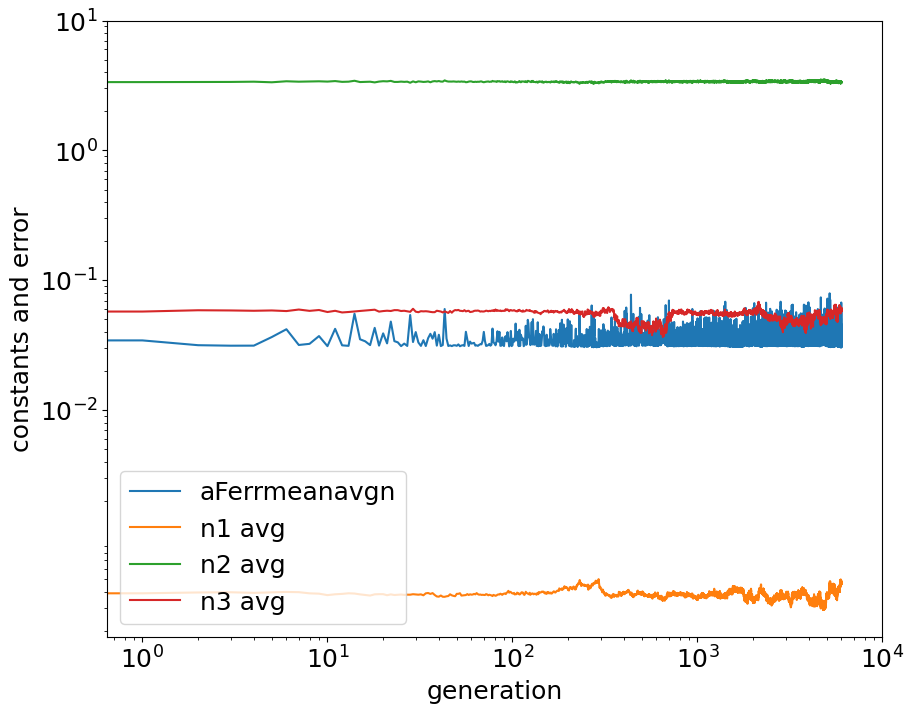

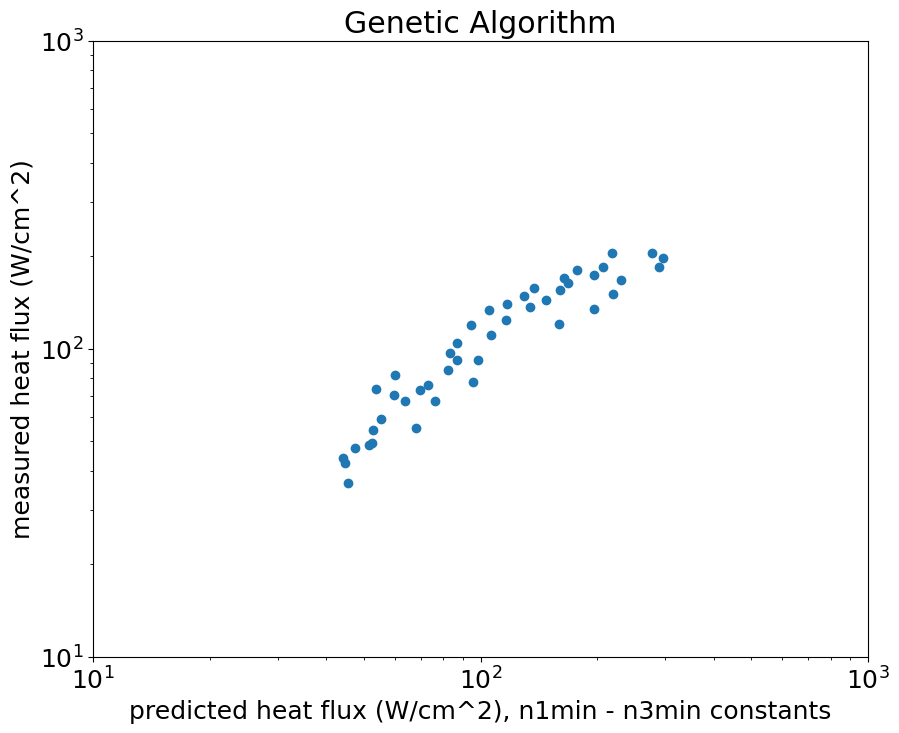

In [16]:
'''>>>>> start CodeP1.2F23
    V.P. Carey ME249, Fall 2023''' 


'''INITIALIZING PARAMETERS'''
n = []
ntemp = []
gen=[0]
n1avg = [0.0]
n2avg = [0.0]
n3avg = [0.0]
n4avg = [0.0]
n5avg = [0.0]
meanAFerr=[0.0]
aFerrmeanavgn=[0.0] 

#set program parameters
NGEN = 6000      #number of generations (steps)
MFRAC = 0.5   # faction of median threshold

# here the number of data vectors equals the number of DNA strands (or organisms)
# they can be different if they are randomly paired to compute Ferr (survivability) function
for k in range(NGEN-1):
    gen.append(k+1)   # generation array stores the
    meanAFerr.append(0.0)
    aFerrmeanavgn.append(0.0)
    n1avg.append(0.0)
    n2avg.append(0.0)
    n3avg.append(0.0)
    n4avg.append(0.0)
    n5avg.append(0.0)
    
'''guesses for initial solution population'''
n0i =  -1.0 
n1i = 0.00034288690509631456
n2i = 3.388978173642796
n3i = 0.0579936013447091
n4i = 1.215 
n5i = 0.145


#- initialize arrays before start of evolution loop EL
#then - create array of DNA strands n[i] and ntemp[i] with dimesnion NS = 5

#i initialize array where rows are dna vectors [n0i,n1i,...n5i] with random pertubations
n =  [[-1., n1i+0.001*random(), n2i+0.1*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()]]
for i in range(ND):
    n.append([-1., n1i+0.0001*random(), n2i+0.001*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()])
#print (n) # uncomment command to print array so it can be checked

# store also in wtemp
ntemp = deepcopy(n)

#initialize Ferr values an dother loop parameters
#define arrays of Ferr (error) functions
#individual solution error and absoute error
Ferr =  [[0.0]]  
#population average solution error and absoute error
Ferravgn =  [[0.0]]
aFerr =  [[0.0]]
aFerravgn =  [[0.0]]

#store zeros in ND genes
for i in range(ND-1):
    #individual solution error and absoute error
    Ferr.append([0.0])
    aFerr.append([0.0])
    #population average solution error and absoute error
    Ferravgn.append([0.0])
    aFerravgn.append([0.0])
#print (Ferr)

aFerrmeanavgnMin=1000000000.0 
# these store the  n values for minimum population average error durng NGEN generations
n1min = 0.0
n2min = 0.0
n3min = 0.0
n4min = 0.0
n5min = 0.0
aFerrta = 0.0
# these store the time averaged n values durng from generation 800 to NGEN generations
n1min = 0.0
n1ta = 0.0
n2ta = 0.0
n3ta = 0.0
n4ta = 0.0
n5ta = 0.0

'''START OF EVOLUTION LOOP'''
# ------------------------------------------
# k is generation number, NGEN IS TOTAL NUMBER OF GENERATIONS COMPUTED
for k in range(NGEN):
    
    '''In this program , the number of organisms (solutions) NS is taken to be equal to the 
    number of data points ND so for each generation, each solution can be compared to a different 
    data point and all the data is compared in each generation.  The order of the solutions in the array 
    that holds the solution constants is constantly changing due to mating and selection, so the pairing 
    is random.'''
    
    
    '''CALCULATING ERROR (FITNESS)
    In this program, the absolute error in the logrithm of the physical heat flux is 
    used to evaluate fitness.'''
    
    # Here we calculate error Ferr and absolute error aFerr for each data point and organism pair 
    # for specified n(i), and calculate (mean aFerr) = aFerrmean
    # and (median aFerr) = aFerrmedian for the data collection and specified n(i)
    # Note that the number data points ND equals the number of solutions (organisms) in the population
    #====================================================================================
    '''CALCULATING ERROR (FITNESS)'''
    for i in range(ND):
        
        Ferr[i] = n[i][0]*lydata[i][0] + math.log(n[i][1]) + n[i][2]*lydata[i][1]
        Ferr[i] = Ferr[i] + n[i][3]*math.log( ydata[i][2] ) 
           
        aFerr[i] = abs(Ferr[i])/abs(lydata[i][0])  #- absolute fractional error
    #-------------
    aFerrmean = np.mean(aFerr) #mean error for population for this generation
    meanAFerr[k]=aFerrmean  #store aFerrmean for this generation gen[k]=k
    aFerrmedian = np.median(aFerr) #median error for population for this generation

    '''SELECTION'''
    #pick survivors 
    #[2] calculate survival cutoff, set number kept = nkeep = 0
    #==============================================
    clim = MFRAC*aFerrmedian  #cut off limit is a fraction/multiplier MFRAC of median value for population
    nkeep = 0
    
    # now check each organism/solution to see if aFerr is less than cut of limit
    #if yes, store n for next generation population in ntemp, at end nkeep = number that survive
    #and number of new offspring = NS-nkeep
    #==============================================
    for j in range(NS):  # NS Ferr values, one for each solution in population
        if (aFerr[j] < clim):
            nkeep = nkeep + 1
            #ntemp[nkeep][0] = n[j][0] = -1 so it is unchanged;
            ntemp[nkeep-1][1] = n[j][1];
            ntemp[nkeep-1][2] = n[j][2];
            ntemp[nkeep-1][3] = n[j][3];
            ntemp[nkeep-1][4] = n[j][4];
            ntemp[nkeep-1][5] = n[j][5];
    #now have survivors in leading entries in list of ntemp vectors from 1 to nkeep
    #compute number to be added by mating
    nnew = NS - nkeep  
    
    '''MATING'''
    #[4] for nnew new organisms/solutions,
    # randomly pick two survivors, randomly pick DNA (n) from pair for each offspring
    #==============================================================
    for j in range(nnew): 
        # pick two survivors randomly
        nmate1 = np.random.randint(low=0, high=nkeep+1)
        nmate2 = np.random.randint(low=0, high=nkeep+1)
        
        #then randomly pick DNA from parents for offspring
        
        '''here, do not change property ntemp[nkeep+j+1][0], it's always fixed at the value -1'''
        #if (np.random.rand() < 0.5)
        #    ntemp[nkeep+j+1][0] = n[nmate1][0]  
        #else
        #    ntemp[nkeep+j+1][0] = n[nmate2][0]
      
        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][1] = n[nmate1][1]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 1, mutation added
        else:
            ntemp[nkeep+j+1][1] = n[nmate2][1]*(1.+0.09*2.*(0.5-np.random.rand()))
    
        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][2] = n[nmate1][2]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 2, mutation added
        else:
            ntemp[nkeep+j+1][2] = n[nmate2][2]*(1.+0.09*2.*(0.5-np.random.rand()))
    
        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][3] = n[nmate1][3]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 3, mutation added
        else:
            ntemp[nkeep+j+1][3] = n[nmate2][3]*(1.+0.09*2.*(0.5-np.random.rand()))
        '''    
        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][4] = n[nmate1][4]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 4, mutation added
        else:
            ntemp[nkeep+j+1][4] = n[nmate2][4]*(1.+0.09*2.*(0.5-np.random.rand()))
                
        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][5] = n[nmate1][5]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 5, mutation added
        else:
            ntemp[nkeep+j+1][5] = n[nmate2][5]*(1.+0.09*2.*(0.5-np.random.rand()))
        '''
    #=============================================
    n = deepcopy(ntemp)   # save ntemp as n for use in next generation (next iteration)
    
    
    '''AVERAGING OVER POPULATION AND OVER TIME, FINDING MINIMUM ERROR SET OF n VALUES'''
    # [6] calculate n1avg[k], etc., which are average n values for population of organisms (solutions) 
    # at this generation k
    #=============================================
    #initialize average n's to zero and sum contribution of each member of the solution population 
    n1avg[k] = 0.0;
    n2avg[k] = 0.0;
    n3avg[k] = 0.0;
    n4avg[k] = 0.0;
    n5avg[k] = 0.0;
    for j in range(NS):    
        n1avg[k] = n1avg[k] + n[j][1]/NS; 
        n2avg[k] = n2avg[k] + n[j][2]/NS; 
        n3avg[k] = n3avg[k] + n[j][3]/NS;
        n4avg[k] = n4avg[k] + n[j][4]/NS;
        n5avg[k] = n5avg[k] + n[j][5]/NS;

    # Here we compute aFerravgn[i] = absolute Ferr of logrithm data point i using average n values 
    # for this solutions generation k
    # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
    # 
    #=============================================
    ''' CALCULATING MEAN ERROR FOR POPULATION'''
    for i in range(ND): 
        Ferravgn[i] = -1.*lydata[i][0] + math.log(n1avg[k]) + n2avg[k]*lydata[i][1]
        Ferravgn[i] = Ferravgn[i] + n3avg[k]*math.log( ydata[i][2] ) 
            
        #aFerravgn[i] = abs(Ferr[i])/abs(lydata[i][0])
        aFerravgn[i] = abs(Ferravgn[i])/abs(lydata[i][0])
    #-------------
    aFerrmeanavgn[k] = np.mean(aFerravgn)
    
    
    # next, update time average of n valaues in population (n1ta[k], etc.) 
    # for generations = k > 800 up to total NGEN
    #=============================================
    aFerrta = aFerrta + aFerrmeanavgn[k]/NGEN
    if (k > 800):
        n1ta = n1ta + n1avg[k]/(NGEN-800)
        n2ta = n2ta + n2avg[k]/(NGEN-800)
        n3ta = n3ta + n3avg[k]/(NGEN-800)
        n4ta = n4ta + n4avg[k]/(NGEN-800)
        n5ta = n5ta + n5avg[k]/(NGEN-800)
    
    # compare aFerrmeanavgn[k] to previous minimum value and save 
    # it and corresponding n(i) values if the value for this generation k is lower 
    #=============================================
    if (aFerrmeanavgn[k] < aFerrmeanavgnMin):
        aFerrmeanavgnMin = aFerrmeanavgn[k] 
        n1min = n1avg[k]
        n2min = n2avg[k]
        n3min = n3avg[k]
        n4min = n4avg[k]
        n5min = n5avg[k]
    
    #print('avg n1-n4:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], aFerrmeanavgn[k])
    #print ('kvalue =', k)
    '''end of evolution loop'''
    # ------------------------------------------------------------------
    # ------------------------------------------------------------------
    
    
# ------------------------------------------------------------------
#final print and plot of results
# ------------------------------------------------------------------
print('ENDING: pop. avg n1-n3,aFerrmean:', n1avg[k], n2avg[k], n3avg[k], aFerrmeanavgn[k])
print('MINUMUM:  avg n1-n3,aFerrmeanMin:', n1min, n2min, n3min, aFerrmeanavgnMin)
print('TIME AVG:    avg n1-n3,aFerrmean:', n1ta, n2ta, n3ta, aFerrta)

#SETTING UP PLOTS

#========
#initialize values
qpppred =  [[0.0]]
qppdata =  [[0.0]]
for i in range(ND-1):
    qpppred.append([0.0])
    qppdata.append([0.0])   
#calculate predicted and data values to plot
for i in range(ND):
    qpppred[i] = n1min*(ydata[i][1]**n2min) * ((ydata[i][2])**n3min) 
    qppdata[i] = ydata[i][0] 
    
#========

# constants evolution plots
# x axis values are generation number 
# corresponding y axis values are mean absolute population error aFerrmeanavgn and n values
# plotting the points  

plt.rcParams.update({'font.size': 18})

# aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
# computed using the mean n values
plt.plot(gen, aFerrmeanavgn) 
plt.plot(gen, n1avg)
plt.plot(gen, n2avg)
plt.plot(gen, n3avg)
plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg'], loc='lower left')
#plt.plot(gen, n4avg)
#plt.plot(gen, n5avg)
#plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg', 'n4 avg', 'n5 avg'], loc='upper right')

# naming the x axis 
plt.xlabel('generation') 
# naming the y axis 
plt.ylabel('constants and error') 
plt.loglog()
plt.yticks([0.01,0.1,1.0,10])
plt.xticks([1,10,100,1000,10000]) 
plt.show() 


'''CALCULATE PREDICTED VALUES AND RETRIEVE DATA VALUES TO PLOT'''
plt.scatter(qpppred, qppdata)
plt.title('Genetic Algorithm')
plt.xlabel('predicted heat flux (W/cm^2), n1min - n3min constants')
plt.ylabel('measured heat flux (W/cm^2)')
plt.loglog()
plt.xlim(xmax = 1000, xmin = 10)
plt.ylim(ymax = 1000, ymin = 10)

plt.show()
    
# end CodeP1.2F23 





In [17]:
qppdata = np.array(qppdata)
qpppred = np.array(qpppred)
qpp_df = pd.DataFrame({'qppdata':qppdata, 'qpppred': qpppred})

rmse = np.sqrt(((qpp_df['qppdata'] - qpp_df['qpppred']) ** 2).mean())
print("RMSE: ", rmse)

RMSE:  32.15005939012409


## Guess 3
* n1i = 0.00041208090197466764
* n2i = 3.3750508477576373
* n3i = 0.056959173430856214

ENDING: pop. avg n1-n3,aFerrmean: 0.0005349734685711665 3.302568886998924 0.055773978684168814 0.031037316201217784
MINUMUM:  avg n1-n3,aFerrmeanMin: 0.0008277703548592931 3.1718499877606154 0.05432873043300026 0.029345649413600263
TIME AVG:    avg n1-n3,aFerrmean: 0.0005703664749195031 3.2758256921138833 0.05433712501016763 0.034354443513740784


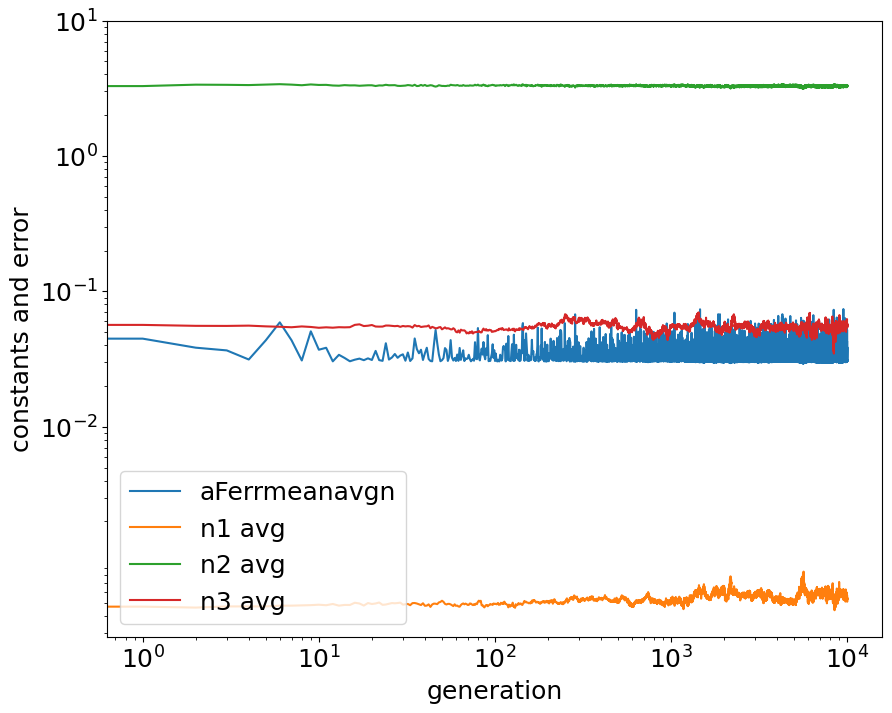

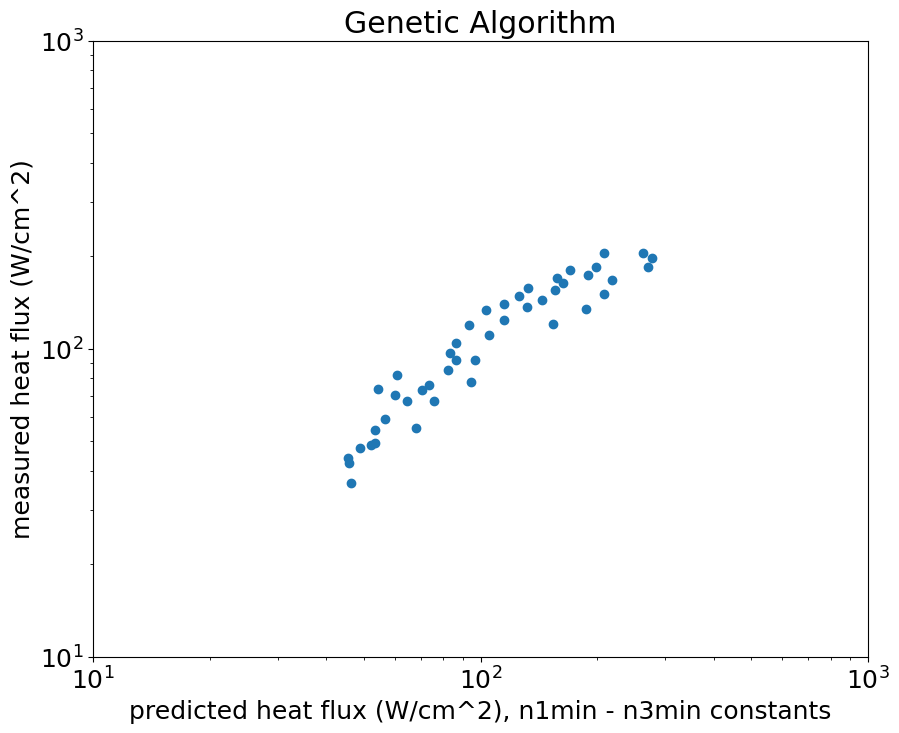

In [18]:
'''>>>>> start CodeP1.2F23
    V.P. Carey ME249, Fall 2023''' 


'''INITIALIZING PARAMETERS'''
n = []
ntemp = []
gen=[0]
n1avg = [0.0]
n2avg = [0.0]
n3avg = [0.0]
n4avg = [0.0]
n5avg = [0.0]
meanAFerr=[0.0]
aFerrmeanavgn=[0.0] 

#set program parameters
NGEN = 10000      #number of generations (steps)
MFRAC = 0.5   # faction of median threshold

# here the number of data vectors equals the number of DNA strands (or organisms)
# they can be different if they are randomly paired to compute Ferr (survivability) function
for k in range(NGEN-1):
    gen.append(k+1)   # generation array stores the
    meanAFerr.append(0.0)
    aFerrmeanavgn.append(0.0)
    n1avg.append(0.0)
    n2avg.append(0.0)
    n3avg.append(0.0)
    n4avg.append(0.0)
    n5avg.append(0.0)
    
'''guesses for initial solution population'''
n0i =  -1.0 
n1i = 0.00041208090197466764
n2i = 3.3750508477576373
n3i = 0.056959173430856214
n4i = 1.215 
n5i = 0.145


#- initialize arrays before start of evolution loop EL
#then - create array of DNA strands n[i] and ntemp[i] with dimesnion NS = 5

#i initialize array where rows are dna vectors [n0i,n1i,...n5i] with random pertubations
n =  [[-1., n1i+0.001*random(), n2i+0.1*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()]]
for i in range(ND):
    n.append([-1., n1i+0.0001*random(), n2i+0.001*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()])
#print (n) # uncomment command to print array so it can be checked

# store also in wtemp
ntemp = deepcopy(n)

#initialize Ferr values an dother loop parameters
#define arrays of Ferr (error) functions
#individual solution error and absoute error
Ferr =  [[0.0]]  
#population average solution error and absoute error
Ferravgn =  [[0.0]]
aFerr =  [[0.0]]
aFerravgn =  [[0.0]]

#store zeros in ND genes
for i in range(ND-1):
    #individual solution error and absoute error
    Ferr.append([0.0])
    aFerr.append([0.0])
    #population average solution error and absoute error
    Ferravgn.append([0.0])
    aFerravgn.append([0.0])
#print (Ferr)

aFerrmeanavgnMin=1000000000.0 
# these store the  n values for minimum population average error durng NGEN generations
n1min = 0.0
n2min = 0.0
n3min = 0.0
n4min = 0.0
n5min = 0.0
aFerrta = 0.0
# these store the time averaged n values durng from generation 800 to NGEN generations
n1min = 0.0
n1ta = 0.0
n2ta = 0.0
n3ta = 0.0
n4ta = 0.0
n5ta = 0.0

'''START OF EVOLUTION LOOP'''
# ------------------------------------------
# k is generation number, NGEN IS TOTAL NUMBER OF GENERATIONS COMPUTED
for k in range(NGEN):
    
    '''In this program , the number of organisms (solutions) NS is taken to be equal to the 
    number of data points ND so for each generation, each solution can be compared to a different 
    data point and all the data is compared in each generation.  The order of the solutions in the array 
    that holds the solution constants is constantly changing due to mating and selection, so the pairing 
    is random.'''
    
    
    '''CALCULATING ERROR (FITNESS)
    In this program, the absolute error in the logrithm of the physical heat flux is 
    used to evaluate fitness.'''
    
    # Here we calculate error Ferr and absolute error aFerr for each data point and organism pair 
    # for specified n(i), and calculate (mean aFerr) = aFerrmean
    # and (median aFerr) = aFerrmedian for the data collection and specified n(i)
    # Note that the number data points ND equals the number of solutions (organisms) in the population
    #====================================================================================
    '''CALCULATING ERROR (FITNESS)'''
    for i in range(ND):
        
        Ferr[i] = n[i][0]*lydata[i][0] + math.log(n[i][1]) + n[i][2]*lydata[i][1]
        Ferr[i] = Ferr[i] + n[i][3]*math.log( ydata[i][2] ) 
           
        aFerr[i] = abs(Ferr[i])/abs(lydata[i][0])  #- absolute fractional error
    #-------------
    aFerrmean = np.mean(aFerr) #mean error for population for this generation
    meanAFerr[k]=aFerrmean  #store aFerrmean for this generation gen[k]=k
    aFerrmedian = np.median(aFerr) #median error for population for this generation

    '''SELECTION'''
    #pick survivors 
    #[2] calculate survival cutoff, set number kept = nkeep = 0
    #==============================================
    clim = MFRAC*aFerrmedian  #cut off limit is a fraction/multiplier MFRAC of median value for population
    nkeep = 0
    
    # now check each organism/solution to see if aFerr is less than cut of limit
    #if yes, store n for next generation population in ntemp, at end nkeep = number that survive
    #and number of new offspring = NS-nkeep
    #==============================================
    for j in range(NS):  # NS Ferr values, one for each solution in population
        if (aFerr[j] < clim):
            nkeep = nkeep + 1
            #ntemp[nkeep][0] = n[j][0] = -1 so it is unchanged;
            ntemp[nkeep-1][1] = n[j][1];
            ntemp[nkeep-1][2] = n[j][2];
            ntemp[nkeep-1][3] = n[j][3];
            ntemp[nkeep-1][4] = n[j][4];
            ntemp[nkeep-1][5] = n[j][5];
    #now have survivors in leading entries in list of ntemp vectors from 1 to nkeep
    #compute number to be added by mating
    nnew = NS - nkeep  
    
    '''MATING'''
    #[4] for nnew new organisms/solutions,
    # randomly pick two survivors, randomly pick DNA (n) from pair for each offspring
    #==============================================================
    for j in range(nnew): 
        # pick two survivors randomly
        nmate1 = np.random.randint(low=0, high=nkeep+1)
        nmate2 = np.random.randint(low=0, high=nkeep+1)
        
        #then randomly pick DNA from parents for offspring
        
        '''here, do not change property ntemp[nkeep+j+1][0], it's always fixed at the value -1'''
        #if (np.random.rand() < 0.5)
        #    ntemp[nkeep+j+1][0] = n[nmate1][0]  
        #else
        #    ntemp[nkeep+j+1][0] = n[nmate2][0]
      
        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][1] = n[nmate1][1]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 1, mutation added
        else:
            ntemp[nkeep+j+1][1] = n[nmate2][1]*(1.+0.09*2.*(0.5-np.random.rand()))
    
        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][2] = n[nmate1][2]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 2, mutation added
        else:
            ntemp[nkeep+j+1][2] = n[nmate2][2]*(1.+0.09*2.*(0.5-np.random.rand()))
    
        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][3] = n[nmate1][3]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 3, mutation added
        else:
            ntemp[nkeep+j+1][3] = n[nmate2][3]*(1.+0.09*2.*(0.5-np.random.rand()))
        '''    
        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][4] = n[nmate1][4]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 4, mutation added
        else:
            ntemp[nkeep+j+1][4] = n[nmate2][4]*(1.+0.09*2.*(0.5-np.random.rand()))
                
        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][5] = n[nmate1][5]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 5, mutation added
        else:
            ntemp[nkeep+j+1][5] = n[nmate2][5]*(1.+0.09*2.*(0.5-np.random.rand()))
        '''
    #=============================================
    n = deepcopy(ntemp)   # save ntemp as n for use in next generation (next iteration)
    
    
    '''AVERAGING OVER POPULATION AND OVER TIME, FINDING MINIMUM ERROR SET OF n VALUES'''
    # [6] calculate n1avg[k], etc., which are average n values for population of organisms (solutions) 
    # at this generation k
    #=============================================
    #initialize average n's to zero and sum contribution of each member of the solution population 
    n1avg[k] = 0.0;
    n2avg[k] = 0.0;
    n3avg[k] = 0.0;
    n4avg[k] = 0.0;
    n5avg[k] = 0.0;
    for j in range(NS):    
        n1avg[k] = n1avg[k] + n[j][1]/NS; 
        n2avg[k] = n2avg[k] + n[j][2]/NS; 
        n3avg[k] = n3avg[k] + n[j][3]/NS;
        n4avg[k] = n4avg[k] + n[j][4]/NS;
        n5avg[k] = n5avg[k] + n[j][5]/NS;

    # Here we compute aFerravgn[i] = absolute Ferr of logrithm data point i using average n values 
    # for this solutions generation k
    # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
    # 
    #=============================================
    ''' CALCULATING MEAN ERROR FOR POPULATION'''
    for i in range(ND): 
        Ferravgn[i] = -1.*lydata[i][0] + math.log(n1avg[k]) + n2avg[k]*lydata[i][1]
        Ferravgn[i] = Ferravgn[i] + n3avg[k]*math.log( ydata[i][2] ) 
            
        #aFerravgn[i] = abs(Ferr[i])/abs(lydata[i][0])
        aFerravgn[i] = abs(Ferravgn[i])/abs(lydata[i][0])
    #-------------
    aFerrmeanavgn[k] = np.mean(aFerravgn)
    
    
    # next, update time average of n valaues in population (n1ta[k], etc.) 
    # for generations = k > 800 up to total NGEN
    #=============================================
    aFerrta = aFerrta + aFerrmeanavgn[k]/NGEN
    if (k > 800):
        n1ta = n1ta + n1avg[k]/(NGEN-800)
        n2ta = n2ta + n2avg[k]/(NGEN-800)
        n3ta = n3ta + n3avg[k]/(NGEN-800)
        n4ta = n4ta + n4avg[k]/(NGEN-800)
        n5ta = n5ta + n5avg[k]/(NGEN-800)
    
    # compare aFerrmeanavgn[k] to previous minimum value and save 
    # it and corresponding n(i) values if the value for this generation k is lower 
    #=============================================
    if (aFerrmeanavgn[k] < aFerrmeanavgnMin):
        aFerrmeanavgnMin = aFerrmeanavgn[k] 
        n1min = n1avg[k]
        n2min = n2avg[k]
        n3min = n3avg[k]
        n4min = n4avg[k]
        n5min = n5avg[k]
    
    #print('avg n1-n4:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], aFerrmeanavgn[k])
    #print ('kvalue =', k)
    '''end of evolution loop'''
    # ------------------------------------------------------------------
    # ------------------------------------------------------------------
    
    
# ------------------------------------------------------------------
#final print and plot of results
# ------------------------------------------------------------------
print('ENDING: pop. avg n1-n3,aFerrmean:', n1avg[k], n2avg[k], n3avg[k], aFerrmeanavgn[k])
print('MINUMUM:  avg n1-n3,aFerrmeanMin:', n1min, n2min, n3min, aFerrmeanavgnMin)
print('TIME AVG:    avg n1-n3,aFerrmean:', n1ta, n2ta, n3ta, aFerrta)

#SETTING UP PLOTS

#========
#initialize values
qpppred =  [[0.0]]
qppdata =  [[0.0]]
for i in range(ND-1):
    qpppred.append([0.0])
    qppdata.append([0.0])   
#calculate predicted and data values to plot
for i in range(ND):
    qpppred[i] = n1min*(ydata[i][1]**n2min) * ((ydata[i][2])**n3min) 
    qppdata[i] = ydata[i][0] 
    
#========

# constants evolution plots
# x axis values are generation number 
# corresponding y axis values are mean absolute population error aFerrmeanavgn and n values
# plotting the points  

plt.rcParams.update({'font.size': 18})

# aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
# computed using the mean n values
plt.plot(gen, aFerrmeanavgn) 
plt.plot(gen, n1avg)
plt.plot(gen, n2avg)
plt.plot(gen, n3avg)
plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg'], loc='lower left')
#plt.plot(gen, n4avg)
#plt.plot(gen, n5avg)
#plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg', 'n4 avg', 'n5 avg'], loc='upper right')

# naming the x axis 
plt.xlabel('generation') 
# naming the y axis 
plt.ylabel('constants and error') 
plt.loglog()
plt.yticks([0.01,0.1,1.0,10])
plt.xticks([1,10,100,1000,10000]) 
plt.show() 


'''CALCULATE PREDICTED VALUES AND RETRIEVE DATA VALUES TO PLOT'''
plt.scatter(qpppred, qppdata)
plt.title('Genetic Algorithm')
plt.xlabel('predicted heat flux (W/cm^2), n1min - n3min constants')
plt.ylabel('measured heat flux (W/cm^2)')
plt.loglog()
plt.xlim(xmax = 1000, xmin = 10)
plt.ylim(ymax = 1000, ymin = 10)

plt.show()
    
# end CodeP1.2F23 





In [19]:
qppdata = np.array(qppdata)
qpppred = np.array(qpppred)
qpp_df = pd.DataFrame({'qppdata':qppdata, 'qpppred': qpppred})

avg_actual = qpp_df['qppdata'].mean()
uncertainty = avg_actual * 0.10
rmse = np.sqrt(((qpp_df['qppdata'] - qpp_df['qpppred']) ** 2).mean())

print("RMSE: ", rmse)
print("Uncertainty Value: ", uncertainty)

RMSE:  27.39720856560156
Uncertainty Value:  11.318000000000001


## Guess 4
* n1i = 0.0005506104717097653
* n2i = 3.214985948187347
* n3i = 0.0544468347699442

ENDING: pop. avg n1-n3,aFerrmean: 0.0004710946977067163 3.366932167255603 0.058807178498433525 0.04376283384049792
MINUMUM:  avg n1-n3,aFerrmeanMin: 0.0006426958889758195 3.2364518595992 0.05340041525417078 0.029767716887817205
TIME AVG:    avg n1-n3,aFerrmean: 0.0005560518733244151 3.2847390139491304 0.06116300992537907 0.034555134092607534


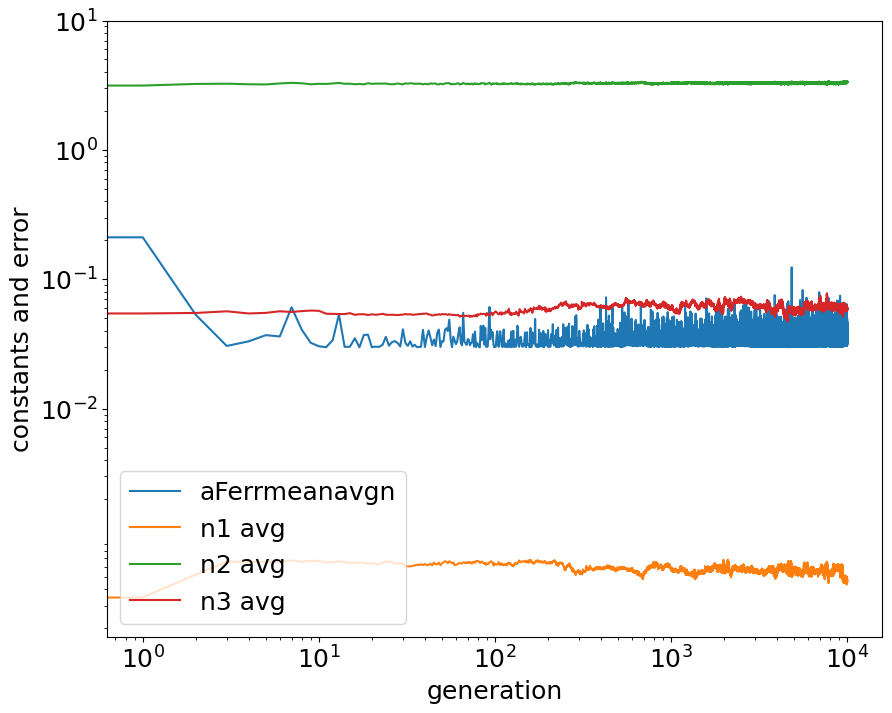

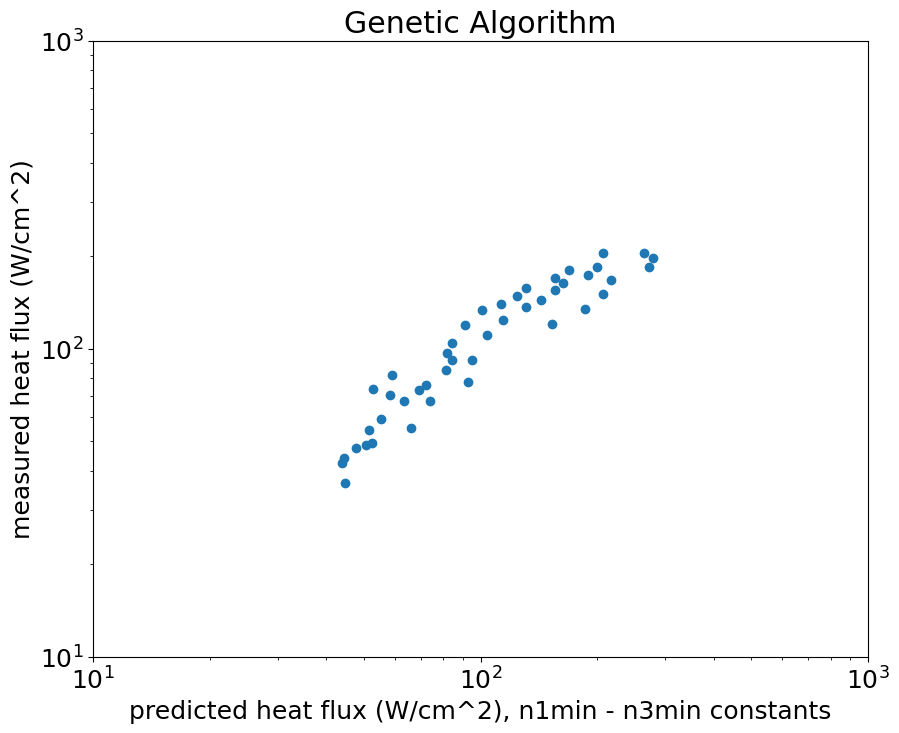

In [20]:
'''>>>>> start CodeP1.2F23
    V.P. Carey ME249, Fall 2023''' 


'''INITIALIZING PARAMETERS'''
n = []
ntemp = []
gen=[0]
n1avg = [0.0]
n2avg = [0.0]
n3avg = [0.0]
n4avg = [0.0]
n5avg = [0.0]
meanAFerr=[0.0]
aFerrmeanavgn=[0.0] 

#set program parameters
NGEN = 10000      #number of generations (steps)
MFRAC = 0.5   # faction of median threshold

# here the number of data vectors equals the number of DNA strands (or organisms)
# they can be different if they are randomly paired to compute Ferr (survivability) function
for k in range(NGEN-1):
    gen.append(k+1)   # generation array stores the
    meanAFerr.append(0.0)
    aFerrmeanavgn.append(0.0)
    n1avg.append(0.0)
    n2avg.append(0.0)
    n3avg.append(0.0)
    n4avg.append(0.0)
    n5avg.append(0.0)
    
'''guesses for initial solution population'''
n0i =  -1.0 
n1i = .00001
n2i = 3.1
n3i = 0.0544468347699442
n4i = 1.215 
n5i = 0.145


#- initialize arrays before start of evolution loop EL
#then - create array of DNA strands n[i] and ntemp[i] with dimesnion NS = 5

#i initialize array where rows are dna vectors [n0i,n1i,...n5i] with random pertubations
n =  [[-1., n1i+0.001*random(), n2i+0.1*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()]]
for i in range(ND):
    n.append([-1., n1i+0.0001*random(), n2i+0.001*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()])
#print (n) # uncomment command to print array so it can be checked

# store also in wtemp
ntemp = deepcopy(n)

#initialize Ferr values an dother loop parameters
#define arrays of Ferr (error) functions
#individual solution error and absoute error
Ferr =  [[0.0]]  
#population average solution error and absoute error
Ferravgn =  [[0.0]]
aFerr =  [[0.0]]
aFerravgn =  [[0.0]]

#store zeros in ND genes
for i in range(ND-1):
    #individual solution error and absoute error
    Ferr.append([0.0])
    aFerr.append([0.0])
    #population average solution error and absoute error
    Ferravgn.append([0.0])
    aFerravgn.append([0.0])
#print (Ferr)

aFerrmeanavgnMin=1000000000.0 
# these store the  n values for minimum population average error durng NGEN generations
n1min = 0.0
n2min = 0.0
n3min = 0.0
n4min = 0.0
n5min = 0.0
aFerrta = 0.0
# these store the time averaged n values durng from generation 800 to NGEN generations
n1min = 0.0
n1ta = 0.0
n2ta = 0.0
n3ta = 0.0
n4ta = 0.0
n5ta = 0.0

'''START OF EVOLUTION LOOP'''
# ------------------------------------------
# k is generation number, NGEN IS TOTAL NUMBER OF GENERATIONS COMPUTED
for k in range(NGEN):
    
    '''In this program , the number of organisms (solutions) NS is taken to be equal to the 
    number of data points ND so for each generation, each solution can be compared to a different 
    data point and all the data is compared in each generation.  The order of the solutions in the array 
    that holds the solution constants is constantly changing due to mating and selection, so the pairing 
    is random.'''
    
    
    '''CALCULATING ERROR (FITNESS)
    In this program, the absolute error in the logrithm of the physical heat flux is 
    used to evaluate fitness.'''
    
    # Here we calculate error Ferr and absolute error aFerr for each data point and organism pair 
    # for specified n(i), and calculate (mean aFerr) = aFerrmean
    # and (median aFerr) = aFerrmedian for the data collection and specified n(i)
    # Note that the number data points ND equals the number of solutions (organisms) in the population
    #====================================================================================
    '''CALCULATING ERROR (FITNESS)'''
    for i in range(ND):
        
        Ferr[i] = n[i][0]*lydata[i][0] + math.log(n[i][1]) + n[i][2]*lydata[i][1]
        Ferr[i] = Ferr[i] + n[i][3]*math.log( ydata[i][2] ) 
           
        aFerr[i] = abs(Ferr[i])/abs(lydata[i][0])  #- absolute fractional error
    #-------------
    aFerrmean = np.mean(aFerr) #mean error for population for this generation
    meanAFerr[k]=aFerrmean  #store aFerrmean for this generation gen[k]=k
    aFerrmedian = np.median(aFerr) #median error for population for this generation

    '''SELECTION'''
    #pick survivors 
    #[2] calculate survival cutoff, set number kept = nkeep = 0
    #==============================================
    clim = MFRAC*aFerrmedian  #cut off limit is a fraction/multiplier MFRAC of median value for population
    nkeep = 0
    
    # now check each organism/solution to see if aFerr is less than cut of limit
    #if yes, store n for next generation population in ntemp, at end nkeep = number that survive
    #and number of new offspring = NS-nkeep
    #==============================================
    for j in range(NS):  # NS Ferr values, one for each solution in population
        if (aFerr[j] < clim):
            nkeep = nkeep + 1
            #ntemp[nkeep][0] = n[j][0] = -1 so it is unchanged;
            ntemp[nkeep-1][1] = n[j][1];
            ntemp[nkeep-1][2] = n[j][2];
            ntemp[nkeep-1][3] = n[j][3];
            ntemp[nkeep-1][4] = n[j][4];
            ntemp[nkeep-1][5] = n[j][5];
    #now have survivors in leading entries in list of ntemp vectors from 1 to nkeep
    #compute number to be added by mating
    nnew = NS - nkeep  
    
    '''MATING'''
    #[4] for nnew new organisms/solutions,
    # randomly pick two survivors, randomly pick DNA (n) from pair for each offspring
    #==============================================================
    for j in range(nnew): 
        # pick two survivors randomly
        nmate1 = np.random.randint(low=0, high=nkeep+1)
        nmate2 = np.random.randint(low=0, high=nkeep+1)
        
        #then randomly pick DNA from parents for offspring
        
        '''here, do not change property ntemp[nkeep+j+1][0], it's always fixed at the value -1'''
        #if (np.random.rand() < 0.5)
        #    ntemp[nkeep+j+1][0] = n[nmate1][0]  
        #else
        #    ntemp[nkeep+j+1][0] = n[nmate2][0]
      
        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][1] = n[nmate1][1]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 1, mutation added
        else:
            ntemp[nkeep+j+1][1] = n[nmate2][1]*(1.+0.09*2.*(0.5-np.random.rand()))
    
        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][2] = n[nmate1][2]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 2, mutation added
        else:
            ntemp[nkeep+j+1][2] = n[nmate2][2]*(1.+0.09*2.*(0.5-np.random.rand()))
    
        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][3] = n[nmate1][3]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 3, mutation added
        else:
            ntemp[nkeep+j+1][3] = n[nmate2][3]*(1.+0.09*2.*(0.5-np.random.rand()))
        '''    
        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][4] = n[nmate1][4]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 4, mutation added
        else:
            ntemp[nkeep+j+1][4] = n[nmate2][4]*(1.+0.09*2.*(0.5-np.random.rand()))
                
        if (np.random.rand() < 0.5):
            ntemp[nkeep+j+1][5] = n[nmate1][5]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 5, mutation added
        else:
            ntemp[nkeep+j+1][5] = n[nmate2][5]*(1.+0.09*2.*(0.5-np.random.rand()))
        '''
    #=============================================
    n = deepcopy(ntemp)   # save ntemp as n for use in next generation (next iteration)
    
    
    '''AVERAGING OVER POPULATION AND OVER TIME, FINDING MINIMUM ERROR SET OF n VALUES'''
    # [6] calculate n1avg[k], etc., which are average n values for population of organisms (solutions) 
    # at this generation k
    #=============================================
    #initialize average n's to zero and sum contribution of each member of the solution population 
    n1avg[k] = 0.0;
    n2avg[k] = 0.0;
    n3avg[k] = 0.0;
    n4avg[k] = 0.0;
    n5avg[k] = 0.0;
    for j in range(NS):    
        n1avg[k] = n1avg[k] + n[j][1]/NS; 
        n2avg[k] = n2avg[k] + n[j][2]/NS; 
        n3avg[k] = n3avg[k] + n[j][3]/NS;
        n4avg[k] = n4avg[k] + n[j][4]/NS;
        n5avg[k] = n5avg[k] + n[j][5]/NS;

    # Here we compute aFerravgn[i] = absolute Ferr of logrithm data point i using average n values 
    # for this solutions generation k
    # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
    # 
    #=============================================
    ''' CALCULATING MEAN ERROR FOR POPULATION'''
    for i in range(ND): 
        Ferravgn[i] = -1.*lydata[i][0] + math.log(n1avg[k]) + n2avg[k]*lydata[i][1]
        Ferravgn[i] = Ferravgn[i] + n3avg[k]*math.log( ydata[i][2] ) 
            
        #aFerravgn[i] = abs(Ferr[i])/abs(lydata[i][0])
        aFerravgn[i] = abs(Ferravgn[i])/abs(lydata[i][0])
    #-------------
    aFerrmeanavgn[k] = np.mean(aFerravgn)
    
    
    # next, update time average of n valaues in population (n1ta[k], etc.) 
    # for generations = k > 800 up to total NGEN
    #=============================================
    aFerrta = aFerrta + aFerrmeanavgn[k]/NGEN
    if (k > 800):
        n1ta = n1ta + n1avg[k]/(NGEN-800)
        n2ta = n2ta + n2avg[k]/(NGEN-800)
        n3ta = n3ta + n3avg[k]/(NGEN-800)
        n4ta = n4ta + n4avg[k]/(NGEN-800)
        n5ta = n5ta + n5avg[k]/(NGEN-800)
    
    # compare aFerrmeanavgn[k] to previous minimum value and save 
    # it and corresponding n(i) values if the value for this generation k is lower 
    #=============================================
    if (aFerrmeanavgn[k] < aFerrmeanavgnMin):
        aFerrmeanavgnMin = aFerrmeanavgn[k] 
        n1min = n1avg[k]
        n2min = n2avg[k]
        n3min = n3avg[k]
        n4min = n4avg[k]
        n5min = n5avg[k]
    
    #print('avg n1-n4:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], aFerrmeanavgn[k])
    #print ('kvalue =', k)
    '''end of evolution loop'''
    # ------------------------------------------------------------------
    # ------------------------------------------------------------------
    
    
# ------------------------------------------------------------------
#final print and plot of results
# ------------------------------------------------------------------
print('ENDING: pop. avg n1-n3,aFerrmean:', n1avg[k], n2avg[k], n3avg[k], aFerrmeanavgn[k])
print('MINUMUM:  avg n1-n3,aFerrmeanMin:', n1min, n2min, n3min, aFerrmeanavgnMin)
print('TIME AVG:    avg n1-n3,aFerrmean:', n1ta, n2ta, n3ta, aFerrta)

#SETTING UP PLOTS

#========
#initialize values
qpppred =  [[0.0]]
qppdata =  [[0.0]]
for i in range(ND-1):
    qpppred.append([0.0])
    qppdata.append([0.0])   
#calculate predicted and data values to plot
for i in range(ND):
    qpppred[i] = n1min*(ydata[i][1]**n2min) * ((ydata[i][2])**n3min) 
    qppdata[i] = ydata[i][0] 
    
#========

# constants evolution plots
# x axis values are generation number 
# corresponding y axis values are mean absolute population error aFerrmeanavgn and n values
# plotting the points  

plt.rcParams.update({'font.size': 18})

# aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
# computed using the mean n values
plt.plot(gen, aFerrmeanavgn) 
plt.plot(gen, n1avg)
plt.plot(gen, n2avg)
plt.plot(gen, n3avg)
plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg'], loc='lower left')
#plt.plot(gen, n4avg)
#plt.plot(gen, n5avg)
#plt.legend(['aFerrmeanavgn', 'n1 avg', 'n2 avg', 'n3 avg', 'n4 avg', 'n5 avg'], loc='upper right')

# naming the x axis 
plt.xlabel('generation') 
# naming the y axis 
plt.ylabel('constants and error') 
plt.loglog()
plt.yticks([0.01,0.1,1.0,10])
plt.xticks([1,10,100,1000,10000]) 
plt.show() 


'''CALCULATE PREDICTED VALUES AND RETRIEVE DATA VALUES TO PLOT'''
plt.scatter(qpppred, qppdata)
plt.title('Genetic Algorithm')
plt.xlabel('predicted heat flux (W/cm^2), n1min - n3min constants')
plt.ylabel('measured heat flux (W/cm^2)')
plt.loglog()
plt.xlim(xmax = 1000, xmin = 10)
plt.ylim(ymax = 1000, ymin = 10)

plt.show()
    
# end CodeP1.2F23 





In [21]:
qppdata = np.array(qppdata)
qpppred = np.array(qpppred)
qpp_df = pd.DataFrame({'qppdata':qppdata, 'qpppred': qpppred})

avg_actual = qpp_df['qppdata'].mean()
uncertainty = avg_actual * 0.10
rmse = np.sqrt(((qpp_df['qppdata'] - qpp_df['qpppred']) ** 2).mean())

print("RMSE: ", rmse)
print("Uncertainty Value: ", uncertainty)

RMSE:  27.738544677980467
Uncertainty Value:  11.318000000000001


## To ask/to do
* How to guess constants 
* Iterate over different values
* 

In [22]:
n1 = [10**i for i in range(1, -10, -1)]
fErr = []
n1

# df = pd.DataFrame()

[10, 1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09]

In [23]:
'''>>>>> start CodeP1.2F23
    V.P. Carey ME249, Fall 2023''' 


'''INITIALIZING PARAMETERS'''
n = []
ntemp = []
gen=[0]
n1avg = [0.0]
n2avg = [0.0]
n3avg = [0.0]
n4avg = [0.0]
n5avg = [0.0]
meanAFerr=[0.0]
aFerrmeanavgn=[0.0] 

#set program parameters
NGEN = 10000      #number of generations (steps)
MFRAC = 0.5   # faction of median threshold

# here the number of data vectors equals the number of DNA strands (or organisms)
# they can be different if they are randomly paired to compute Ferr (survivability) function
for k in range(NGEN-1):
    gen.append(k+1)   # generation array stores the
    meanAFerr.append(0.0)
    aFerrmeanavgn.append(0.0)
    n1avg.append(0.0)
    n2avg.append(0.0)
    n3avg.append(0.0)
    n4avg.append(0.0)
    n5avg.append(0.0)
    
for i in range(len(n1)):
    '''guesses for initial solution population'''
    n0i =  -1.0 
    # n1i = 0.0005506104717097653
    n1i = n1[i]
    n2i = 3.214985948187347
    n3i = 0.0544468347699442
    n4i = 1.215 
    n5i = 0.145


    #- initialize arrays before start of evolution loop EL
    #then - create array of DNA strands n[i] and ntemp[i] with dimesnion NS = 5

    #i initialize array where rows are dna vectors [n0i,n1i,...n5i] with random pertubations
    n =  [[-1., n1i+0.001*random(), n2i+0.1*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()]]
    for i in range(ND):
        n.append([-1., n1i+0.0001*random(), n2i+0.001*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()])
    #print (n) # uncomment command to print array so it can be checked

    # store also in wtemp
    ntemp = deepcopy(n)

    #initialize Ferr values an dother loop parameters
    #define arrays of Ferr (error) functions
    #individual solution error and absoute error
    Ferr =  [[0.0]]  
    #population average solution error and absoute error
    Ferravgn =  [[0.0]]
    aFerr =  [[0.0]]
    aFerravgn =  [[0.0]]

    #store zeros in ND genes
    for i in range(ND-1):
        #individual solution error and absoute error
        Ferr.append([0.0])
        aFerr.append([0.0])
        #population average solution error and absoute error
        Ferravgn.append([0.0])
        aFerravgn.append([0.0])
    #print (Ferr)

    aFerrmeanavgnMin=1000000000.0 
    # these store the  n values for minimum population average error durng NGEN generations
    n1min = 0.0
    n2min = 0.0
    n3min = 0.0
    n4min = 0.0
    n5min = 0.0
    aFerrta = 0.0
    # these store the time averaged n values durng from generation 800 to NGEN generations
    n1min = 0.0
    n1ta = 0.0
    n2ta = 0.0
    n3ta = 0.0
    n4ta = 0.0
    n5ta = 0.0

    '''START OF EVOLUTION LOOP'''
    # ------------------------------------------
    # k is generation number, NGEN IS TOTAL NUMBER OF GENERATIONS COMPUTED
    for k in range(NGEN):
        
        '''In this program , the number of organisms (solutions) NS is taken to be equal to the 
        number of data points ND so for each generation, each solution can be compared to a different 
        data point and all the data is compared in each generation.  The order of the solutions in the array 
        that holds the solution constants is constantly changing due to mating and selection, so the pairing 
        is random.'''
        
        
        '''CALCULATING ERROR (FITNESS)
        In this program, the absolute error in the logrithm of the physical heat flux is 
        used to evaluate fitness.'''
        
        # Here we calculate error Ferr and absolute error aFerr for each data point and organism pair 
        # for specified n(i), and calculate (mean aFerr) = aFerrmean
        # and (median aFerr) = aFerrmedian for the data collection and specified n(i)
        # Note that the number data points ND equals the number of solutions (organisms) in the population
        #====================================================================================
        '''CALCULATING ERROR (FITNESS)'''
        for i in range(ND):
            
            Ferr[i] = n[i][0]*lydata[i][0] + math.log(n[i][1]) + n[i][2]*lydata[i][1]
            Ferr[i] = Ferr[i] + n[i][3]*math.log( ydata[i][2] ) 
            
            aFerr[i] = abs(Ferr[i])/abs(lydata[i][0])  #- absolute fractional error
        #-------------
        aFerrmean = np.mean(aFerr) #mean error for population for this generation
        meanAFerr[k]=aFerrmean  #store aFerrmean for this generation gen[k]=k
        aFerrmedian = np.median(aFerr) #median error for population for this generation

        '''SELECTION'''
        #pick survivors 
        #[2] calculate survival cutoff, set number kept = nkeep = 0
        #==============================================
        clim = MFRAC*aFerrmedian  #cut off limit is a fraction/multiplier MFRAC of median value for population
        nkeep = 0
        
        # now check each organism/solution to see if aFerr is less than cut of limit
        #if yes, store n for next generation population in ntemp, at end nkeep = number that survive
        #and number of new offspring = NS-nkeep
        #==============================================
        for j in range(NS):  # NS Ferr values, one for each solution in population
            if (aFerr[j] < clim):
                nkeep = nkeep + 1
                #ntemp[nkeep][0] = n[j][0] = -1 so it is unchanged;
                ntemp[nkeep-1][1] = n[j][1];
                ntemp[nkeep-1][2] = n[j][2];
                ntemp[nkeep-1][3] = n[j][3];
                ntemp[nkeep-1][4] = n[j][4];
                ntemp[nkeep-1][5] = n[j][5];
        #now have survivors in leading entries in list of ntemp vectors from 1 to nkeep
        #compute number to be added by mating
        nnew = NS - nkeep  
        
        '''MATING'''
        #[4] for nnew new organisms/solutions,
        # randomly pick two survivors, randomly pick DNA (n) from pair for each offspring
        #==============================================================
        for j in range(nnew): 
            # pick two survivors randomly
            nmate1 = np.random.randint(low=0, high=nkeep+1)
            nmate2 = np.random.randint(low=0, high=nkeep+1)
            
            #then randomly pick DNA from parents for offspring
            
            '''here, do not change property ntemp[nkeep+j+1][0], it's always fixed at the value -1'''
            #if (np.random.rand() < 0.5)
            #    ntemp[nkeep+j+1][0] = n[nmate1][0]  
            #else
            #    ntemp[nkeep+j+1][0] = n[nmate2][0]
        
            if (np.random.rand() < 0.5):
                ntemp[nkeep+j+1][1] = n[nmate1][1]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 1, mutation added
            else:
                ntemp[nkeep+j+1][1] = n[nmate2][1]*(1.+0.09*2.*(0.5-np.random.rand()))
        
            if (np.random.rand() < 0.5):
                ntemp[nkeep+j+1][2] = n[nmate1][2]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 2, mutation added
            else:
                ntemp[nkeep+j+1][2] = n[nmate2][2]*(1.+0.09*2.*(0.5-np.random.rand()))
        
            if (np.random.rand() < 0.5):
                ntemp[nkeep+j+1][3] = n[nmate1][3]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 3, mutation added
            else:
                ntemp[nkeep+j+1][3] = n[nmate2][3]*(1.+0.09*2.*(0.5-np.random.rand()))
            '''    
            if (np.random.rand() < 0.5):
                ntemp[nkeep+j+1][4] = n[nmate1][4]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 4, mutation added
            else:
                ntemp[nkeep+j+1][4] = n[nmate2][4]*(1.+0.09*2.*(0.5-np.random.rand()))
                    
            if (np.random.rand() < 0.5):
                ntemp[nkeep+j+1][5] = n[nmate1][5]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 5, mutation added
            else:
                ntemp[nkeep+j+1][5] = n[nmate2][5]*(1.+0.09*2.*(0.5-np.random.rand()))
            '''
        #=============================================
        n = deepcopy(ntemp)   # save ntemp as n for use in next generation (next iteration)
        
        
        '''AVERAGING OVER POPULATION AND OVER TIME, FINDING MINIMUM ERROR SET OF n VALUES'''
        # [6] calculate n1avg[k], etc., which are average n values for population of organisms (solutions) 
        # at this generation k
        #=============================================
        #initialize average n's to zero and sum contribution of each member of the solution population 
        n1avg[k] = 0.0;
        n2avg[k] = 0.0;
        n3avg[k] = 0.0;
        n4avg[k] = 0.0;
        n5avg[k] = 0.0;
        for j in range(NS):    
            n1avg[k] = n1avg[k] + n[j][1]/NS; 
            n2avg[k] = n2avg[k] + n[j][2]/NS; 
            n3avg[k] = n3avg[k] + n[j][3]/NS;
            n4avg[k] = n4avg[k] + n[j][4]/NS;
            n5avg[k] = n5avg[k] + n[j][5]/NS;

        # Here we compute aFerravgn[i] = absolute Ferr of logrithm data point i using average n values 
        # for this solutions generation k
        # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
        # 
        #=============================================
        ''' CALCULATING MEAN ERROR FOR POPULATION'''
        for i in range(ND): 
            Ferravgn[i] = -1.*lydata[i][0] + math.log(n1avg[k]) + n2avg[k]*lydata[i][1]
            Ferravgn[i] = Ferravgn[i] + n3avg[k]*math.log( ydata[i][2] ) 
                
            #aFerravgn[i] = abs(Ferr[i])/abs(lydata[i][0])
            aFerravgn[i] = abs(Ferravgn[i])/abs(lydata[i][0])
        #-------------
        aFerrmeanavgn[k] = np.mean(aFerravgn)
        
        
        # next, update time average of n valaues in population (n1ta[k], etc.) 
        # for generations = k > 800 up to total NGEN
        #=============================================
        aFerrta = aFerrta + aFerrmeanavgn[k]/NGEN
        if (k > 800):
            n1ta = n1ta + n1avg[k]/(NGEN-800)
            n2ta = n2ta + n2avg[k]/(NGEN-800)
            n3ta = n3ta + n3avg[k]/(NGEN-800)
            n4ta = n4ta + n4avg[k]/(NGEN-800)
            n5ta = n5ta + n5avg[k]/(NGEN-800)
        
        # compare aFerrmeanavgn[k] to previous minimum value and save 
        # it and corresponding n(i) values if the value for this generation k is lower 
        #=============================================
        if (aFerrmeanavgn[k] < aFerrmeanavgnMin):
            aFerrmeanavgnMin = aFerrmeanavgn[k] 
            n1min = n1avg[k]
            n2min = n2avg[k]
            n3min = n3avg[k]
            n4min = n4avg[k]
            n5min = n5avg[k]
        
        #print('avg n1-n4:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], aFerrmeanavgn[k])
        #print ('kvalue =', k)
        '''end of evolution loop'''
        # ------------------------------------------------------------------
        # ------------------------------------------------------------------
        
        
    # ------------------------------------------------------------------
    #final print and plot of results
    # ------------------------------------------------------------------
    print('ENDING: pop. avg n1-n3,aFerrmean:', n1avg[k], n2avg[k], n3avg[k], aFerrmeanavgn[k])
    print('MINUMUM:  avg n1-n3,aFerrmeanMin:', n1min, n2min, n3min, aFerrmeanavgnMin)
    print('TIME AVG:    avg n1-n3,aFerrmean:', n1ta, n2ta, n3ta, aFerrta)
    
    fErr.append(aFerrmeanavgnMin)
    #SETTING UP PLOTS

    #========
    #initialize values
    qpppred =  [[0.0]]
    qppdata =  [[0.0]]
    for i in range(ND-1):
        qpppred.append([0.0])
        qppdata.append([0.0])   
    #calculate predicted and data values to plot
    for i in range(ND):
        qpppred[i] = n1min*(ydata[i][1]**n2min) * ((ydata[i][2])**n3min) 
        qppdata[i] = ydata[i][0] 
        
    #========

    # constants evolution plots
    # x axis values are generation number 
    # corresponding y axis values are mean absolute population error aFerrmeanavgn and n values
    # plotting the points  

    plt.rcParams.update({'font.size': 18})

    # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
    # computed using the mean n values





In [ ]:
fErr

[2.04438025228126,
 1.5520309381876845,
 1.088259756027272,
 0.0310211164645871,
 0.028603903277090358,
 0.03049079643465751,
 0.02914931909586147,
 0.0295992716835871,
 0.028612374725897248,
 0.028673796497036337,
 0.029312431679350402]

In [ ]:
n1fErr_df = pd.DataFrame({'n1': n1, 'fErr': fErr })
n1fErr_df

,n1,fErr
0,1.000000e+01,2.044380
1,1.000000e+00,1.552031
2,1.000000e-01,1.088260
3,1.000000e-02,0.031021
4,1.000000e-03,0.028604
5,1.000000e-04,0.030491
6,1.000000e-05,0.029149
7,1.000000e-06,0.029599
8,1.000000e-07,0.028612
9,1.000000e-08,0.028674


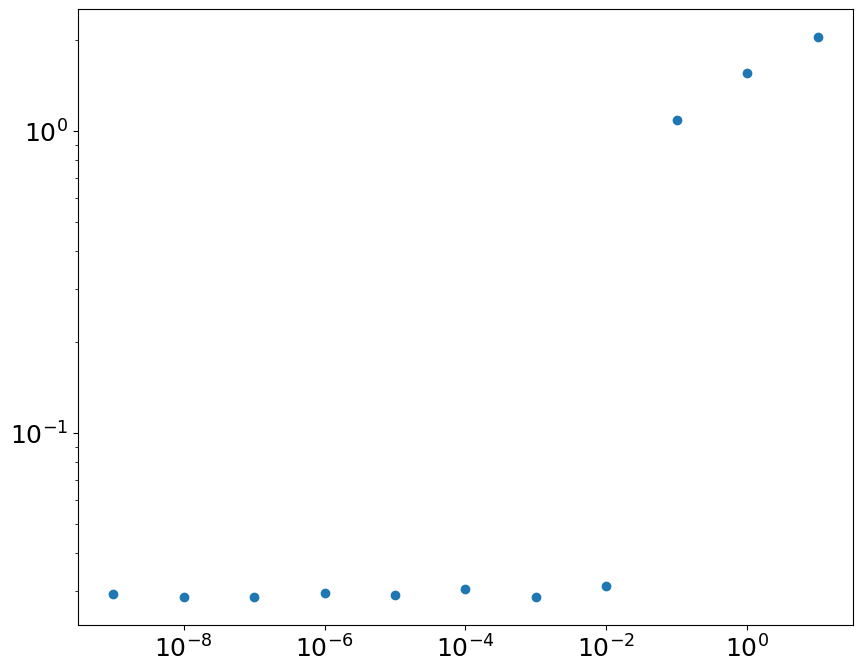

In [ ]:
plt.scatter(n1fErr_df['n1'], n1fErr_df['fErr'])
plt.loglog()
plt.show()

In [ ]:
n2 = [i for i in range(1, 30, 1)]
fErr = []




In [ ]:
'''>>>>> start CodeP1.2F23
    V.P. Carey ME249, Fall 2023''' 


'''INITIALIZING PARAMETERS'''
n = []
ntemp = []
gen=[0]
n1avg = [0.0]
n2avg = [0.0]
n3avg = [0.0]
n4avg = [0.0]
n5avg = [0.0]
meanAFerr=[0.0]
aFerrmeanavgn=[0.0] 

#set program parameters
NGEN = 10000      #number of generations (steps)
MFRAC = 0.5   # faction of median threshold

# here the number of data vectors equals the number of DNA strands (or organisms)
# they can be different if they are randomly paired to compute Ferr (survivability) function
for k in range(NGEN-1):
    gen.append(k+1)   # generation array stores the
    meanAFerr.append(0.0)
    aFerrmeanavgn.append(0.0)
    n1avg.append(0.0)
    n2avg.append(0.0)
    n3avg.append(0.0)
    n4avg.append(0.0)
    n5avg.append(0.0)
    
for i in range(len(n2)):
    '''guesses for initial solution population'''
    n0i =  -1.0 
    n1i = 0.0005506104717097653
    # n2i = 3.214985948187347
    n2i = n2[i]
    n3i = 0.0544468347699442
    n4i = 1.215 
    n5i = 0.145


    #- initialize arrays before start of evolution loop EL
    #then - create array of DNA strands n[i] and ntemp[i] with dimesnion NS = 5

    #i initialize array where rows are dna vectors [n0i,n1i,...n5i] with random pertubations
    n =  [[-1., n1i+0.001*random(), n2i+0.1*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()]]
    for i in range(ND):
        n.append([-1., n1i+0.0001*random(), n2i+0.001*random(), n3i+0.0001*random(), n4i+0.0001*random(), n5i+0.0001*random()])
    #print (n) # uncomment command to print array so it can be checked

    # store also in wtemp
    ntemp = deepcopy(n)

    #initialize Ferr values an dother loop parameters
    #define arrays of Ferr (error) functions
    #individual solution error and absoute error
    Ferr =  [[0.0]]  
    #population average solution error and absoute error
    Ferravgn =  [[0.0]]
    aFerr =  [[0.0]]
    aFerravgn =  [[0.0]]

    #store zeros in ND genes
    for i in range(ND-1):
        #individual solution error and absoute error
        Ferr.append([0.0])
        aFerr.append([0.0])
        #population average solution error and absoute error
        Ferravgn.append([0.0])
        aFerravgn.append([0.0])
    #print (Ferr)

    aFerrmeanavgnMin=1000000000.0 
    # these store the  n values for minimum population average error durng NGEN generations
    n1min = 0.0
    n2min = 0.0
    n3min = 0.0
    n4min = 0.0
    n5min = 0.0
    aFerrta = 0.0
    # these store the time averaged n values durng from generation 800 to NGEN generations
    n1min = 0.0
    n1ta = 0.0
    n2ta = 0.0
    n3ta = 0.0
    n4ta = 0.0
    n5ta = 0.0

    '''START OF EVOLUTION LOOP'''
    # ------------------------------------------
    # k is generation number, NGEN IS TOTAL NUMBER OF GENERATIONS COMPUTED
    for k in range(NGEN):
        
        '''In this program , the number of organisms (solutions) NS is taken to be equal to the 
        number of data points ND so for each generation, each solution can be compared to a different 
        data point and all the data is compared in each generation.  The order of the solutions in the array 
        that holds the solution constants is constantly changing due to mating and selection, so the pairing 
        is random.'''
        
        
        '''CALCULATING ERROR (FITNESS)
        In this program, the absolute error in the logrithm of the physical heat flux is 
        used to evaluate fitness.'''
        
        # Here we calculate error Ferr and absolute error aFerr for each data point and organism pair 
        # for specified n(i), and calculate (mean aFerr) = aFerrmean
        # and (median aFerr) = aFerrmedian for the data collection and specified n(i)
        # Note that the number data points ND equals the number of solutions (organisms) in the population
        #====================================================================================
        '''CALCULATING ERROR (FITNESS)'''
        for i in range(ND):
            
            Ferr[i] = n[i][0]*lydata[i][0] + math.log(n[i][1]) + n[i][2]*lydata[i][1]
            Ferr[i] = Ferr[i] + n[i][3]*math.log( ydata[i][2] ) 
            
            aFerr[i] = abs(Ferr[i])/abs(lydata[i][0])  #- absolute fractional error
        #-------------
        aFerrmean = np.mean(aFerr) #mean error for population for this generation
        meanAFerr[k]=aFerrmean  #store aFerrmean for this generation gen[k]=k
        aFerrmedian = np.median(aFerr) #median error for population for this generation

        '''SELECTION'''
        #pick survivors 
        #[2] calculate survival cutoff, set number kept = nkeep = 0
        #==============================================
        clim = MFRAC*aFerrmedian  #cut off limit is a fraction/multiplier MFRAC of median value for population
        nkeep = 0
        
        # now check each organism/solution to see if aFerr is less than cut of limit
        #if yes, store n for next generation population in ntemp, at end nkeep = number that survive
        #and number of new offspring = NS-nkeep
        #==============================================
        for j in range(NS):  # NS Ferr values, one for each solution in population
            if (aFerr[j] < clim):
                nkeep = nkeep + 1
                #ntemp[nkeep][0] = n[j][0] = -1 so it is unchanged;
                ntemp[nkeep-1][1] = n[j][1];
                ntemp[nkeep-1][2] = n[j][2];
                ntemp[nkeep-1][3] = n[j][3];
                ntemp[nkeep-1][4] = n[j][4];
                ntemp[nkeep-1][5] = n[j][5];
        #now have survivors in leading entries in list of ntemp vectors from 1 to nkeep
        #compute number to be added by mating
        nnew = NS - nkeep  
        
        '''MATING'''
        #[4] for nnew new organisms/solutions,
        # randomly pick two survivors, randomly pick DNA (n) from pair for each offspring
        #==============================================================
        for j in range(nnew): 
            # pick two survivors randomly
            nmate1 = np.random.randint(low=0, high=nkeep+1)
            nmate2 = np.random.randint(low=0, high=nkeep+1)
            
            #then randomly pick DNA from parents for offspring
            
            '''here, do not change property ntemp[nkeep+j+1][0], it's always fixed at the value -1'''
            #if (np.random.rand() < 0.5)
            #    ntemp[nkeep+j+1][0] = n[nmate1][0]  
            #else
            #    ntemp[nkeep+j+1][0] = n[nmate2][0]
        
            if (np.random.rand() < 0.5):
                ntemp[nkeep+j+1][1] = n[nmate1][1]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 1, mutation added
            else:
                ntemp[nkeep+j+1][1] = n[nmate2][1]*(1.+0.09*2.*(0.5-np.random.rand()))
        
            if (np.random.rand() < 0.5):
                ntemp[nkeep+j+1][2] = n[nmate1][2]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 2, mutation added
            else:
                ntemp[nkeep+j+1][2] = n[nmate2][2]*(1.+0.09*2.*(0.5-np.random.rand()))
        
            if (np.random.rand() < 0.5):
                ntemp[nkeep+j+1][3] = n[nmate1][3]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 3, mutation added
            else:
                ntemp[nkeep+j+1][3] = n[nmate2][3]*(1.+0.09*2.*(0.5-np.random.rand()))
            '''    
            if (np.random.rand() < 0.5):
                ntemp[nkeep+j+1][4] = n[nmate1][4]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 4, mutation added
            else:
                ntemp[nkeep+j+1][4] = n[nmate2][4]*(1.+0.09*2.*(0.5-np.random.rand()))
                    
            if (np.random.rand() < 0.5):
                ntemp[nkeep+j+1][5] = n[nmate1][5]*(1.+0.09*2.*(0.5-np.random.rand()))  # property 5, mutation added
            else:
                ntemp[nkeep+j+1][5] = n[nmate2][5]*(1.+0.09*2.*(0.5-np.random.rand()))
            '''
        #=============================================
        n = deepcopy(ntemp)   # save ntemp as n for use in next generation (next iteration)
        
        
        '''AVERAGING OVER POPULATION AND OVER TIME, FINDING MINIMUM ERROR SET OF n VALUES'''
        # [6] calculate n1avg[k], etc., which are average n values for population of organisms (solutions) 
        # at this generation k
        #=============================================
        #initialize average n's to zero and sum contribution of each member of the solution population 
        n1avg[k] = 0.0;
        n2avg[k] = 0.0;
        n3avg[k] = 0.0;
        n4avg[k] = 0.0;
        n5avg[k] = 0.0;
        for j in range(NS):    
            n1avg[k] = n1avg[k] + n[j][1]/NS; 
            n2avg[k] = n2avg[k] + n[j][2]/NS; 
            n3avg[k] = n3avg[k] + n[j][3]/NS;
            n4avg[k] = n4avg[k] + n[j][4]/NS;
            n5avg[k] = n5avg[k] + n[j][5]/NS;

        # Here we compute aFerravgn[i] = absolute Ferr of logrithm data point i using average n values 
        # for this solutions generation k
        # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
        # 
        #=============================================
        ''' CALCULATING MEAN ERROR FOR POPULATION'''
        for i in range(ND): 
            Ferravgn[i] = -1.*lydata[i][0] + math.log(n1avg[k]) + n2avg[k]*lydata[i][1]
            Ferravgn[i] = Ferravgn[i] + n3avg[k]*math.log( ydata[i][2] ) 
                
            #aFerravgn[i] = abs(Ferr[i])/abs(lydata[i][0])
            aFerravgn[i] = abs(Ferravgn[i])/abs(lydata[i][0])
        #-------------
        aFerrmeanavgn[k] = np.mean(aFerravgn)
        
        
        # next, update time average of n valaues in population (n1ta[k], etc.) 
        # for generations = k > 800 up to total NGEN
        #=============================================
        aFerrta = aFerrta + aFerrmeanavgn[k]/NGEN
        if (k > 800):
            n1ta = n1ta + n1avg[k]/(NGEN-800)
            n2ta = n2ta + n2avg[k]/(NGEN-800)
            n3ta = n3ta + n3avg[k]/(NGEN-800)
            n4ta = n4ta + n4avg[k]/(NGEN-800)
            n5ta = n5ta + n5avg[k]/(NGEN-800)
        
        # compare aFerrmeanavgn[k] to previous minimum value and save 
        # it and corresponding n(i) values if the value for this generation k is lower 
        #=============================================
        if (aFerrmeanavgn[k] < aFerrmeanavgnMin):
            aFerrmeanavgnMin = aFerrmeanavgn[k] 
            n1min = n1avg[k]
            n2min = n2avg[k]
            n3min = n3avg[k]
            n4min = n4avg[k]
            n5min = n5avg[k]
        
        #print('avg n1-n4:', n1avg[k], n2avg[k], n3avg[k], n4avg[k], aFerrmeanavgn[k])
        #print ('kvalue =', k)
        '''end of evolution loop'''
        # ------------------------------------------------------------------
        # ------------------------------------------------------------------
        
        
    # ------------------------------------------------------------------
    #final print and plot of results
    # ------------------------------------------------------------------
    print('ENDING: pop. avg n1-n3,aFerrmean:', n1avg[k], n2avg[k], n3avg[k], aFerrmeanavgn[k])
    print('MINUMUM:  avg n1-n3,aFerrmeanMin:', n1min, n2min, n3min, aFerrmeanavgnMin)
    print('TIME AVG:    avg n1-n3,aFerrmean:', n1ta, n2ta, n3ta, aFerrta)
    
    fErr.append(aFerrmeanavgnMin)
    #SETTING UP PLOTS

    #========
    #initialize values
    qpppred =  [[0.0]]
    qppdata =  [[0.0]]
    for i in range(ND-1):
        qpppred.append([0.0])
        qppdata.append([0.0])   
    #calculate predicted and data values to plot
    for i in range(ND):
        qpppred[i] = n1min*(ydata[i][1]**n2min) * ((ydata[i][2])**n3min) 
        qppdata[i] = ydata[i][0] 
        
    #========

    # constants evolution plots
    # x axis values are generation number 
    # corresponding y axis values are mean absolute population error aFerrmeanavgn and n values
    # plotting the points  

    plt.rcParams.update({'font.size': 18})

    # aFerrmeanavgn[k] is the mean of the Ferravgn[i] for the population of organisms/solutions
    # computed using the mean n values





ENDING: pop. avg n1-n3,aFerrmean: 0.001022632668738294 1.1055861727776954 0.05547514569458558 1.611541034309605
MINUMUM:  avg n1-n3,aFerrmeanMin: 0.0010302152224219887 1.1252717454544443 0.054278718161289694 1.5942710155221695
TIME AVG:    avg n1-n3,aFerrmean: 0.0010204604123202217 1.0970166554342273 0.054520066862708376 1.6189098199921776
ENDING: pop. avg n1-n3,aFerrmean: 0.0010578102482199537 2.0249869659233033 0.0544786724957016 0.8650006895855101
MINUMUM:  avg n1-n3,aFerrmeanMin: 0.0010706569039745887 2.089999775265968 0.0549738199184182 0.8100061188257747
TIME AVG:    avg n1-n3,aFerrmean: 0.0010621528667253896 2.026167062508232 0.05454175667258789 0.8629648724850687
ENDING: pop. avg n1-n3,aFerrmean: 0.0005386232495845318 3.276341909173651 0.0494135663352458 0.03141653719923729
MINUMUM:  avg n1-n3,aFerrmeanMin: 0.0010130591044042925 3.1188493767508385 0.05501036786873608 0.02902336841700753
TIME AVG:    avg n1-n3,aFerrmean: 0.0005806577556556921 3.2751448965548806 0.056168776118777

    n2       fErr
0    1   1.594271
1    2   0.810006
2    3   0.029023
3    4   0.029215
4    5   1.421840
5    6   2.283643
6    7   3.089693
7    8   3.746104
8    9   4.627489
9   10   5.333719
10  11   5.952313
11  12   6.885148
12  13   7.596384
13  14   8.491352
14  15   9.272658
15  16  10.170773
16  17  10.670200
17  18  11.576032
18  19  12.335334
19  20  13.221424
20  21  13.903167
21  22  14.638948
22  23  15.460975
23  24  16.147206
24  25  17.139256
25  26  17.854203
26  27  18.741371
27  28  19.406208
28  29  20.171605


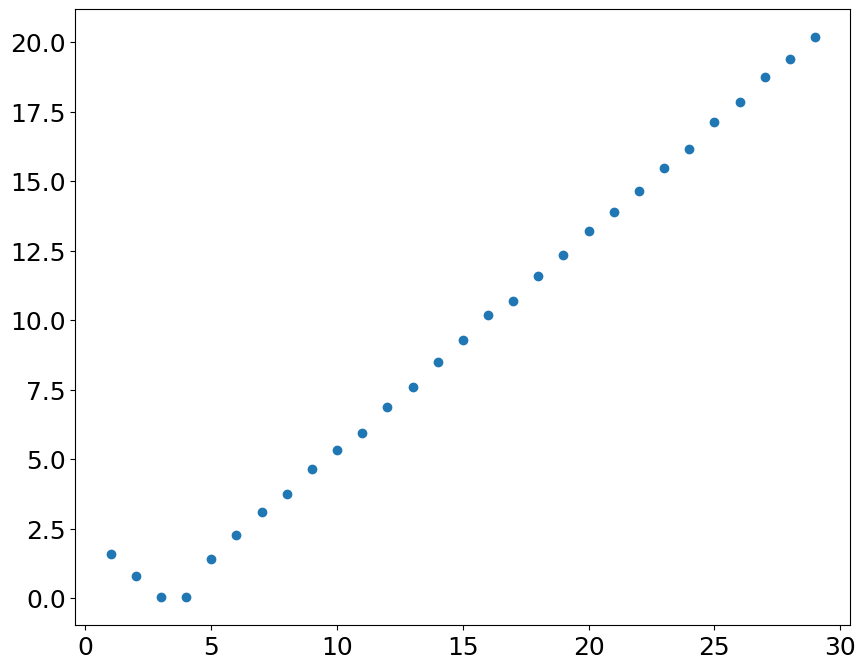

In [ ]:
n2fErr_df = pd.DataFrame({'n2': n2, 'fErr': fErr })
print(n2fErr_df)

plt.scatter(n2fErr_df['n2'], n2fErr_df['fErr'])
# plt.loglog()
plt.show()